In [252]:
%reload_ext autoreload
%autoreload 2
import leidenalg
import igraph as ig
import networkx as nx
from pyeed.network import SequenceNetwork
from pyeed.core import ProteinRecord
import os 
import json
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

from matplotlib import interactive
interactive(True)
import matplotlib as mpl

from Bio import SeqIO

Open all ProteinRecord entries from the json file and parse them into a ProteinRecord 

In [260]:
with open("./network/network.json", 'r') as f: 
    data_json = json.load(f)
# to load it into a Sequence Network object
network2 = SequenceNetwork(**data_json)

ValidationError: 1 validation error for SequenceNetwork
network
  Input should be an instance of Graph [type=is_instance_of, input_value={'directed': False, 'mult...target': 'AAK19606.1'}]}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.7/v/is_instance_of

The proteins from the old database are in a fasta format. All proteins are assigned to the belonging familiy for further analysis

In [59]:
rep_id = []
rep_seq = []
family_1 = []
family_2 = []
family_3 = []
family_4 = []
family_5 = []
family_6 = []
family_7 = []

#family 1
with open("./PHA_fasta/family_1.fasta", 'r') as f: 
    for record in SeqIO.parse(f, 'fasta'):  # (file handle, file format)
        
        # appending extracted fasta data to empty lists variables
        rep_id.append(record.id)
        rep_seq.append(record.seq)
        family_1.append(record.id)

#family 2
with open("./PHA_fasta/family_2.fasta", 'r') as f: 
    for record in SeqIO.parse(f, 'fasta'):  # (file handle, file format)
        
        # appending extracted fasta data to empty lists variables
        rep_id.append(record.id)
        rep_seq.append(record.seq)
        family_2.append(record.id)

#family 3
with open("./PHA_fasta/family_3.fasta", 'r') as f: 
    for record in SeqIO.parse(f, 'fasta'):  # (file handle, file format)
        
        # appending extracted fasta data to empty lists variables
        rep_id.append(record.id)
        rep_seq.append(record.seq)
        family_3.append(record.id)

#family 4
with open("./PHA_fasta/family_4.fasta", 'r') as f: 
    for record in SeqIO.parse(f, 'fasta'):  # (file handle, file format)
        
        # appending extracted fasta data to empty lists variables
        rep_id.append(record.id)
        rep_seq.append(record.seq)
        family_4.append(record.id)

#family 5
with open("./PHA_fasta/family_5.fasta", 'r') as f: 
    for record in SeqIO.parse(f, 'fasta'):  # (file handle, file format)
        
        # appending extracted fasta data to empty lists variables
        rep_id.append(record.id)
        rep_seq.append(record.seq)
        family_5.append(record.id)

# family 6
with open("./PHA_fasta/family_6.fasta", 'r') as f: 
    for record in SeqIO.parse(f, 'fasta'):  # (file handle, file format)
        
        # appending extracted fasta data to empty lists variables
        rep_id.append(record.id)
        rep_seq.append(record.seq)
        family_6.append(record.id)

#family 7
with open("./PHA_fasta/family_7.fasta", 'r') as f: 
    for record in SeqIO.parse(f, 'fasta'):  # (file handle, file format)
        
        # appending extracted fasta data to empty lists variables
        rep_id.append(record.id)
        rep_seq.append(record.seq)
        family_7.append(record.id)

In [3]:
print(len(rep_id))

734


open all old proteins as a ProteinRecord 

In [60]:
current_path = os.getcwd()
print(current_path)

input_folder_filters_regions = os.path.join(current_path, "PHA_fasta", "protein_records")
read_blast_folder = os.path.join(current_path, "PHA_fasta", "protein_records")
#read_blast_folder = os.path.join(current_path, "PHA_Depolymerasen", "proteins")

old_proteins = []
counter = 0
for file in os.listdir(read_blast_folder):
    if file.endswith(".json"):
        try:
            with open(os.path.join(input_folder_filters_regions, file), "r") as f:
                file_data = ProteinRecord.from_json(f)
                old_proteins.append(file_data)

        except: 
            print(f"Cannot open: {file}")
        
        counter += 1

/Users/alinalacheim/Documents/Dokumente/SimTech/5_Semester/Projektarbeit/PHA_Depolymerasen


In [4]:
print(len(old_proteins))
print(old_proteins[0])

695
ProteinRecord
├── id = ABD70057.1
├── name = polyhydroxyalkanoate depolymerase, intracellular
├── organism
│   └── Organism
│       ├── id = 3a2d913f-e496-4c02-a420-c1c26e6fb8a5
│       ├── taxonomy_id = 338969
│       ├── name = Rhodoferax ferrireducens T118
│       ├── domain = Bacteria
│       ├── phylum = Pseudomonadota
│       ├── tax_class = Betaproteobacteria
│       ├── order = Burkholderiales
│       ├── family = family_1
│       └── genus = Rhodoferax
├── sequence = MLYKIYETQRSLMEPFSDLAHSASKVYGNPLSMFGQNPFAQRISAGYDLMHRLGKDYEKPEFGLRTVDVDGVEVAIHERVEIDKPFCELRRFKRFTDDQTTLGKLKGQPAVLIVAPLSGHYATLLRDTVKTMLKDHKVYITDWKNARLVPLSEGEFHLDDYVNYVQEFIRHLQGIYGNCHVVSVCQPTVPVLAAVSLMASRGELTPLSMTMMGGPIDARKSPTAVNNLAMNKSFEWFENNVIYRVPTNFAGAGRRVYPGFLQHSGFVAMNPSNHAKSHYDYFKDLIKGDDASTEAHRKFYDEYNAVLDMDANYYLETIRVVFQEFCLLNGTWNIKGVDGKIEPVRPQDITTTALFSVEGELDDISGSGQTEAVHSICSGVPKSEQKHLEVKGAGHFGIFSGRRWREMVYPAVKSFILSHQPVAAKPAPVVDPVTPVKIEKKPSAAPVKREEVATKNVASKSLRKK
├── regions
│   └── 0
│       └── Region
│       

network with all old sequences colored by family 

In [5]:
print(len(old_proteins))

695


create the Sequence Network

In [231]:
network = SequenceNetwork(sequences=old_proteins, weight='identity')

Output()

update the threshold (number between 0-1)  
create the graph  
set the weight

In [245]:
network.update_threshhold(threshold = 0.17)
# naming the network
G = network.network
weight = 'identity'

get the identity distribution of the Pairwise Alignment created during the Sequence network creation

In [8]:
df = nx.to_pandas_edgelist(G)

Index(['source', 'target', 'sequences', 'gaps', 'identity', 'mismatches',
       'score', 'x_pos', 'y_pos', 'aligned_sequences'],
      dtype='object')


<Axes: ylabel='Frequency'>

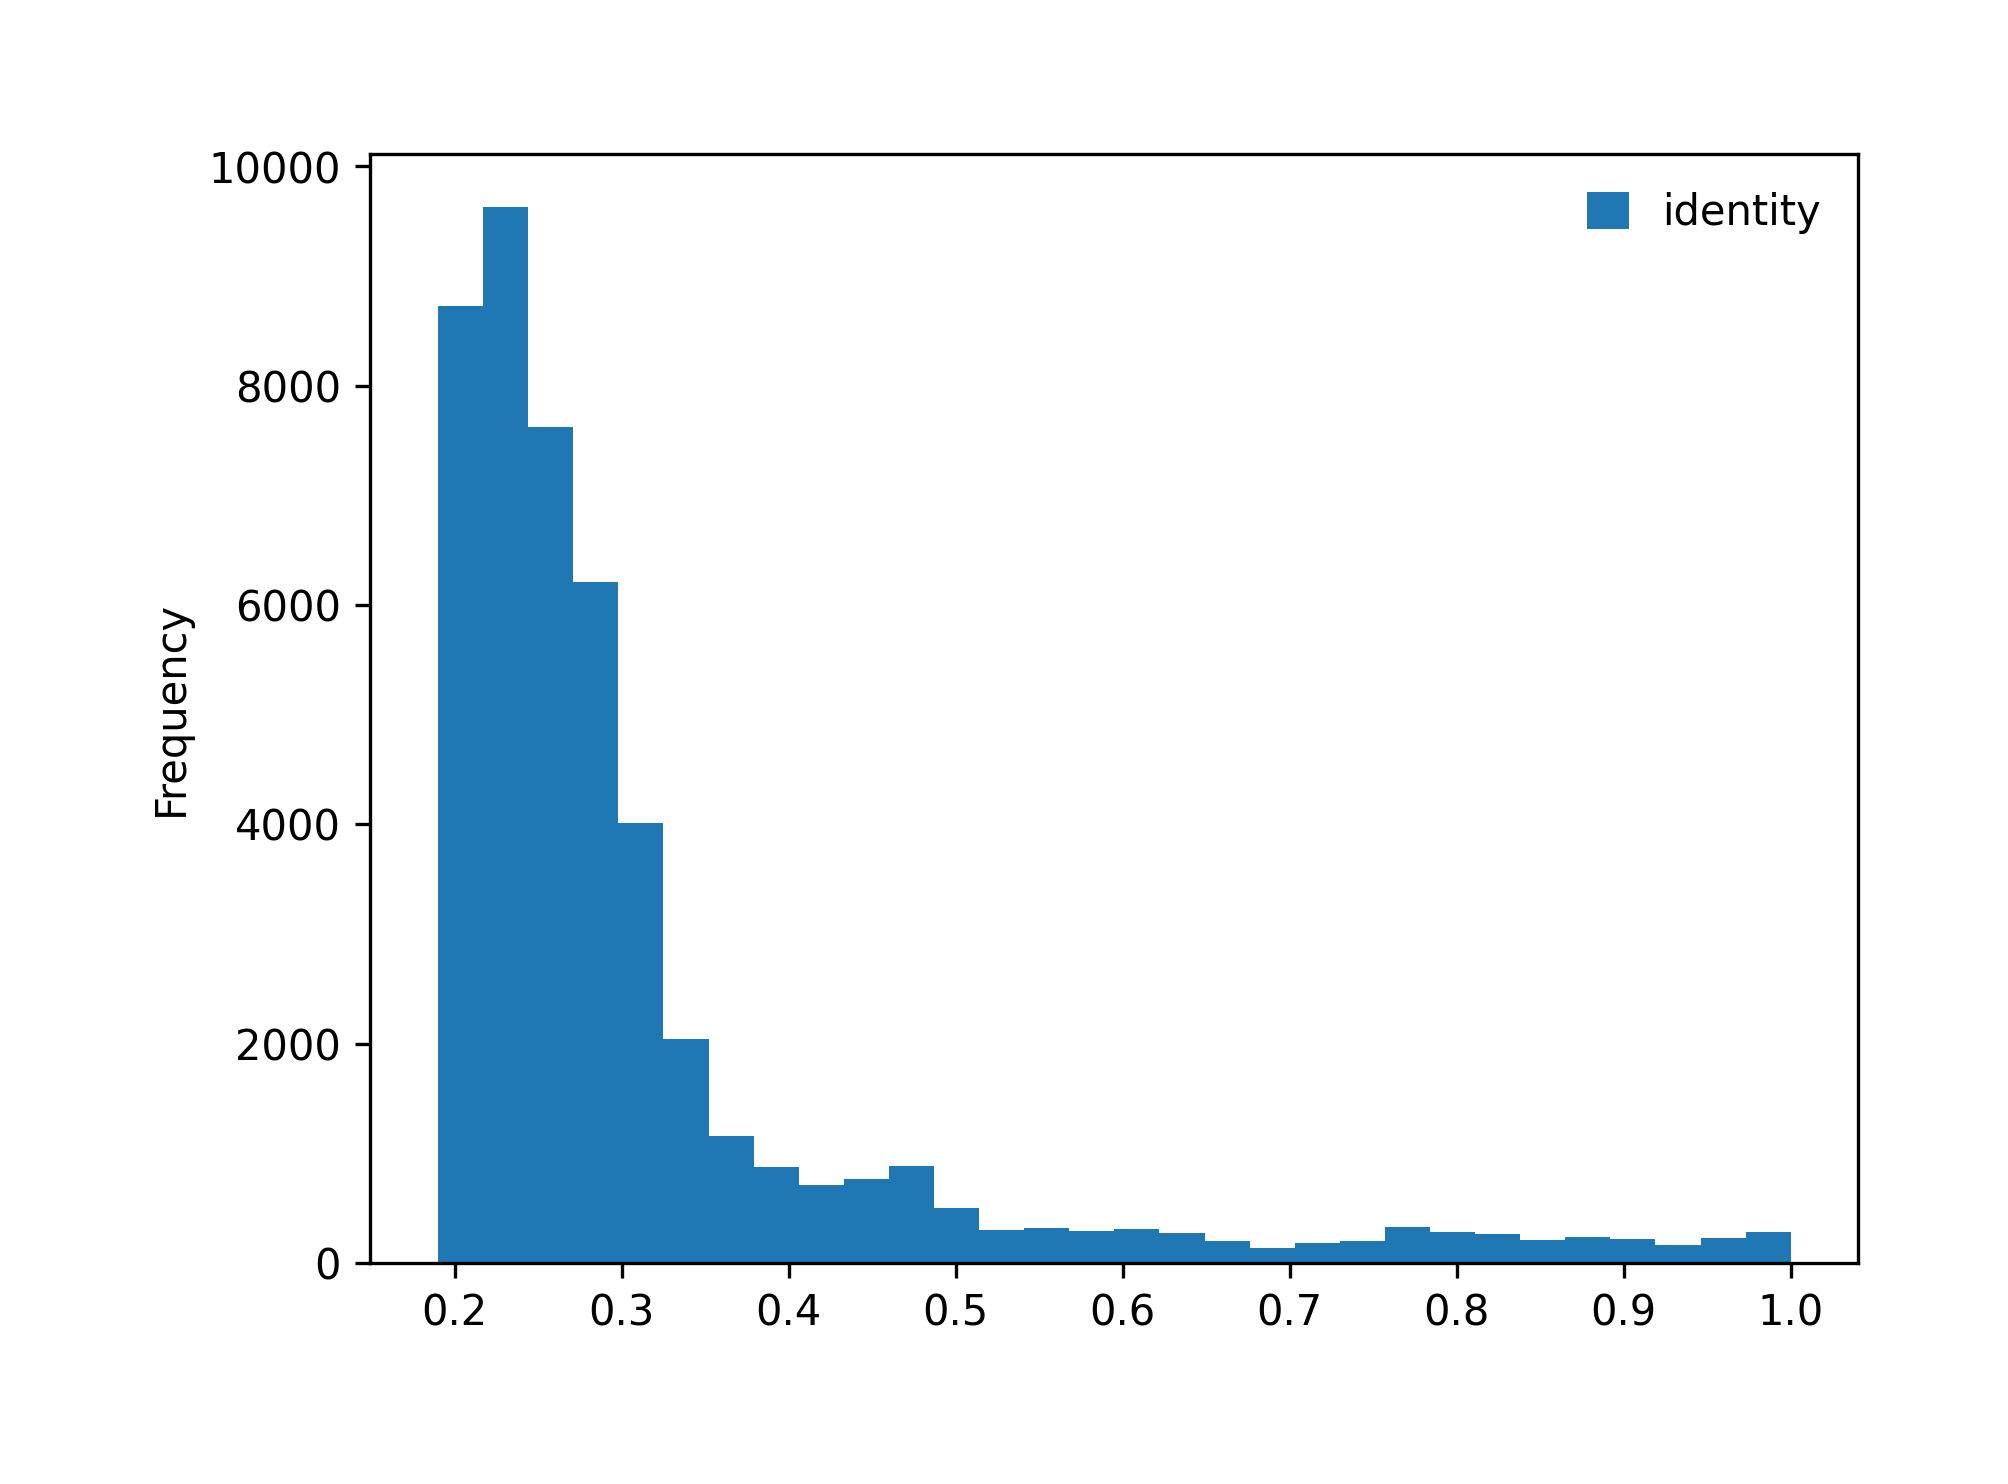

In [9]:
print(df.columns)
#df['identity'].plot.kde(loglog=True)
df = nx.to_pandas_edgelist(G)
df.plot.hist(column=['identity'], bins=30)

remove all isolated nodes as well as all nodes with a degree smaller 4

In [10]:
print(list(nx.isolates(G)))
G.remove_nodes_from(list(nx.isolates(G)))
low_degree = [n for n, d in G.degree() if d < 4]
G.remove_nodes_from(low_degree)

['ABG59664.1', 'CAE08072.1']


create a color map
each family has its own color 

In [247]:
# use the matplotlib plasma colormap
color_map = []
no_family = []
# node color varies with Degree
for v in G: 
    if v in family_1: 
        color_map.append('limegreen')
    elif v in family_2: 
        color_map.append('blue')
    elif v in family_3: 
        color_map.append('lightblue')
    elif v in family_4: 
        color_map.append('purple')
    elif v in family_5: 
        color_map.append('pink')
    elif v in family_6: 
        color_map.append('red')
    elif v in family_7: 
        color_map.append('forestgreen')
    else:
        #color_map.append('yellow')
        no_family.append(v)

In [12]:
len(color_map)

597

remove all nodes that could not be assigned to a family 

In [248]:
G.remove_nodes_from(list(no_family))

show the visualization of the network

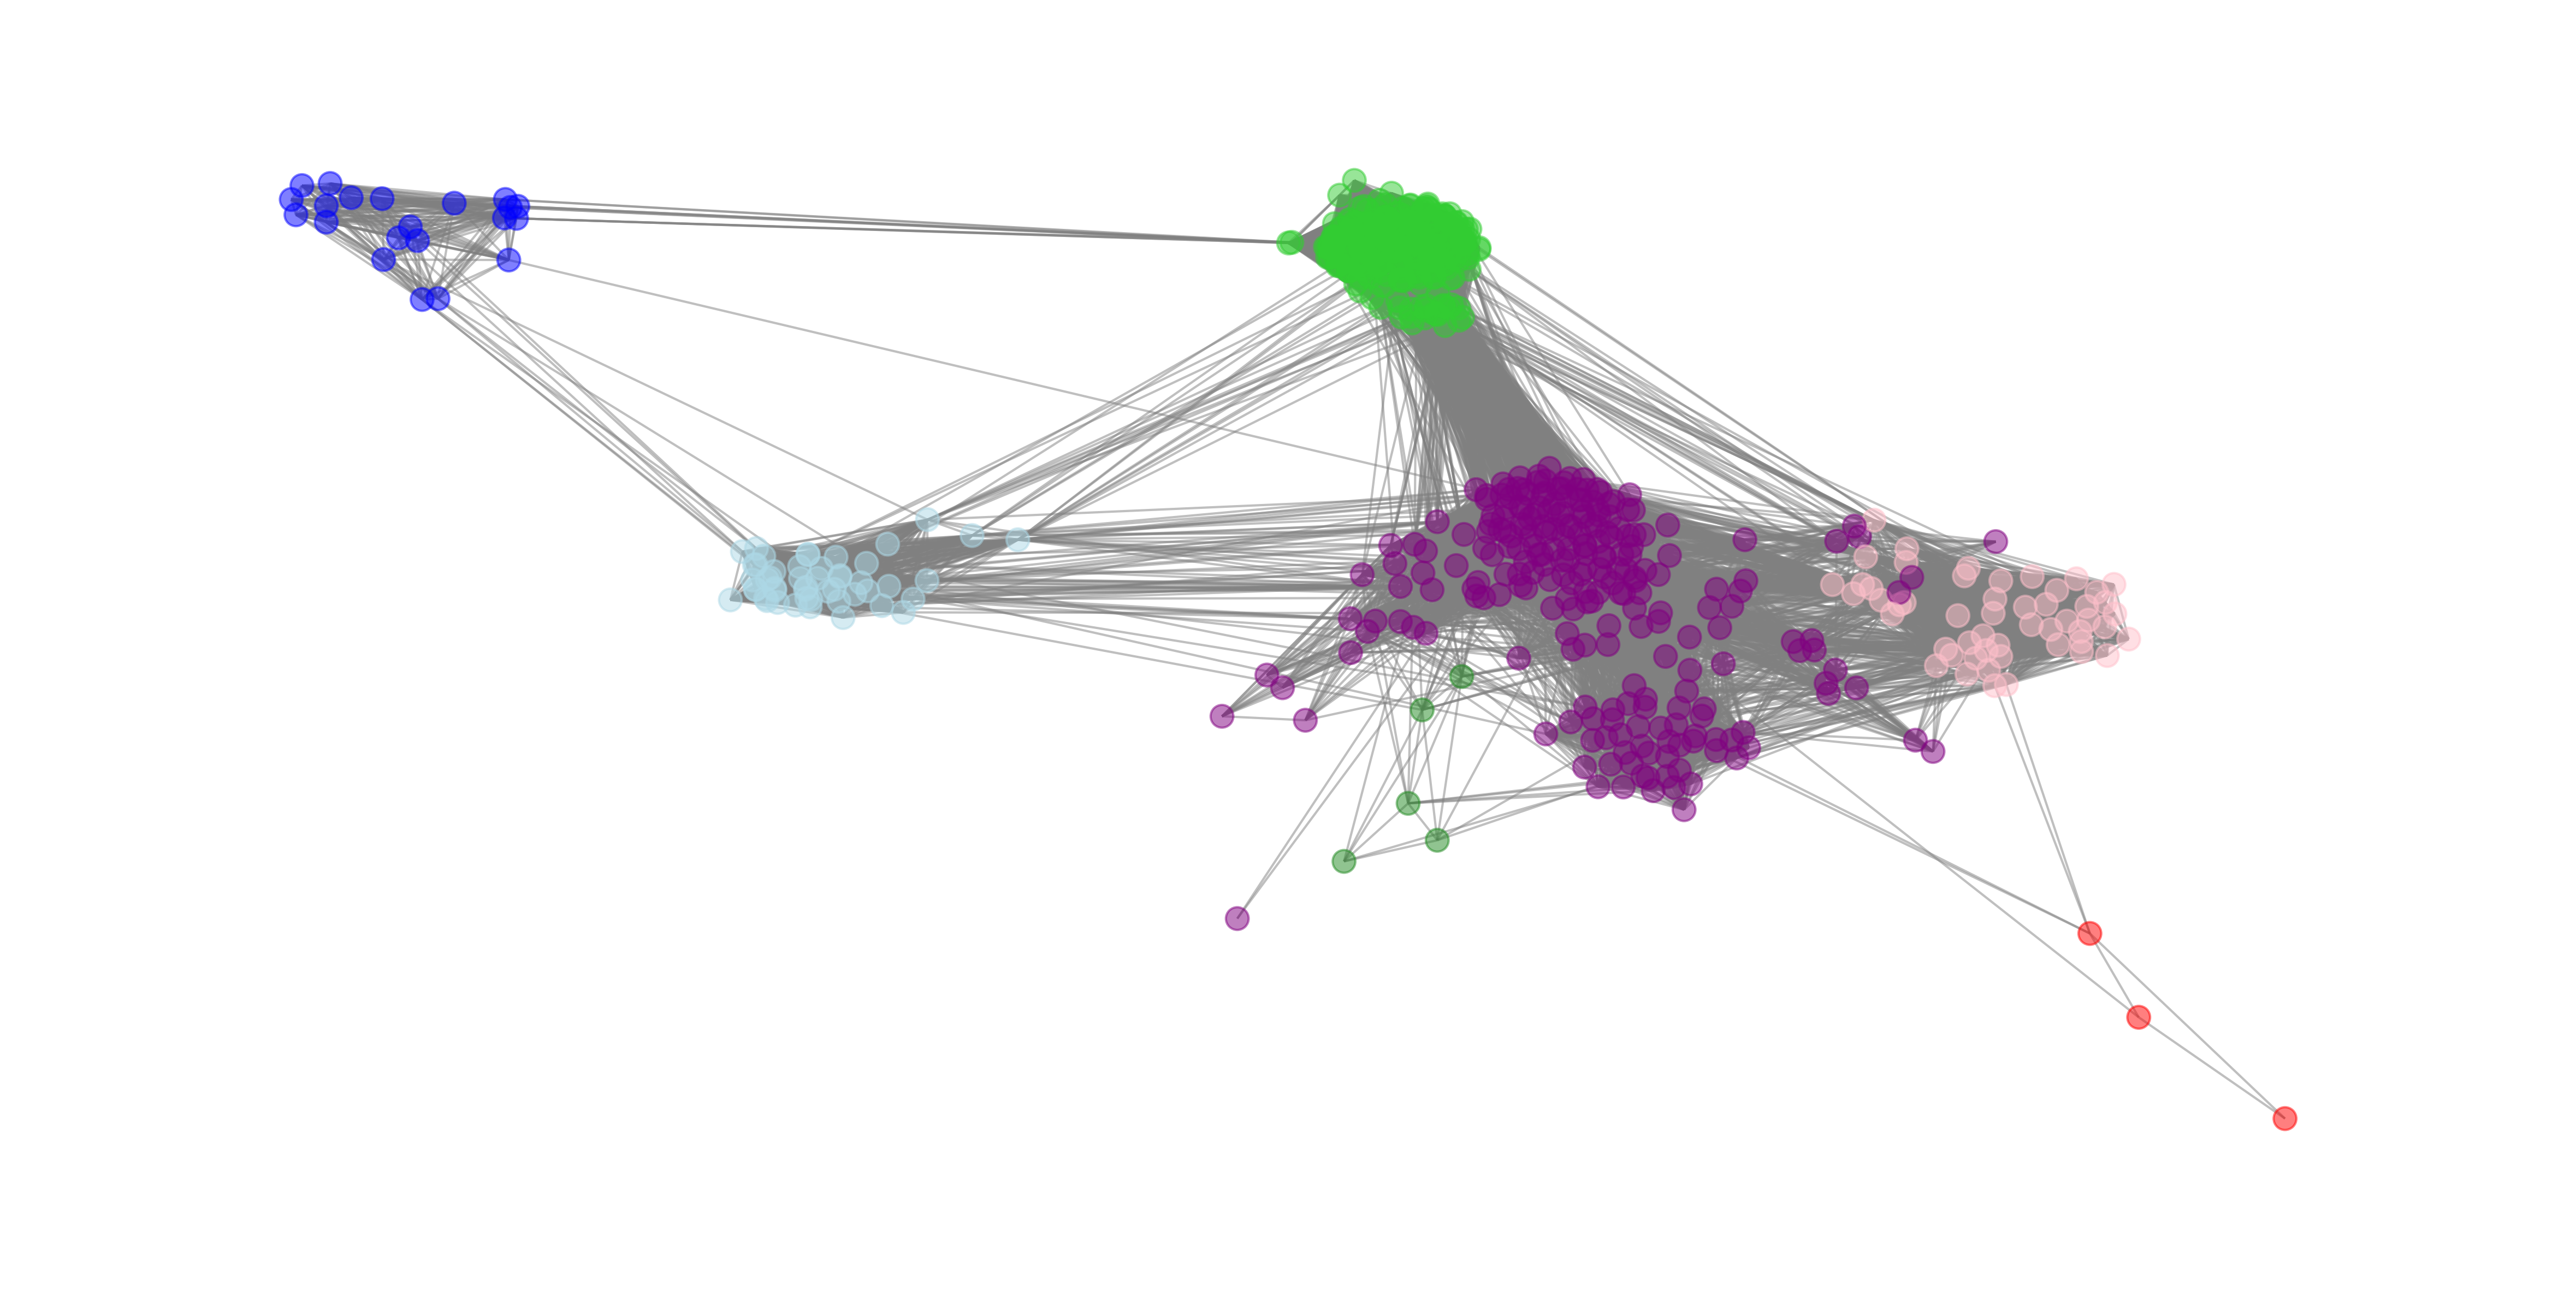

In [249]:
pos = nx.spring_layout(G, weight='identity', iterations=400, seed=18)
plt.figure(figsize=(19,9))
nx.draw_networkx(G, pos=pos, with_labels=False, node_color = color_map, node_size=100, font_color='Black',font_size='6', font_weight='bold', edge_color='grey', alpha=0.5, width=1)
plt.axis('off')

plt.show()

plot the graphes for the each family 

In [61]:
plot_family_1 = []
plot_family_2 = []
plot_family_3 = []
plot_family_4 = []
plot_family_5 = []
plot_family_6 = []
plot_family_7 = []

for protein in old_proteins:
    if protein.organism.family == "family_1": 
        plot_family_1.append(protein)
    elif protein.organism.family == "family_2": 
        plot_family_2.append(protein)
    elif protein.organism.family == "family_3": 
        plot_family_3.append(protein)
    elif protein.organism.family == "family_4": 
        plot_family_4.append(protein)
    elif protein.organism.family == "family_5": 
        plot_family_5.append(protein)
    elif protein.organism.family == "family_6": 
        plot_family_6.append(protein)
    elif protein.organism.family == "family_7": 
        plot_family_7.append(protein)


In [62]:
network_1 = SequenceNetwork(sequences=plot_family_1, weight='identity')
network_2 = SequenceNetwork(sequences=plot_family_2, weight='identity')
network_3 = SequenceNetwork(sequences=plot_family_3, weight='identity')
network_4 = SequenceNetwork(sequences=plot_family_4, weight='identity')
network_5 = SequenceNetwork(sequences=plot_family_5, weight='identity')
network_6 = SequenceNetwork(sequences=plot_family_6, weight='identity')
network_7 = SequenceNetwork(sequences=plot_family_7, weight='identity')

Output()

Output()

Output()

Output()

Output()

Output()

Output()

In [180]:
network_1.update_threshhold(threshold = 0.3)
# naming the network
G_1 = network_1.network
weight = 'identity'

In [181]:
network_2.update_threshhold(threshold = 0.3)
# naming the network
G_2 = network_2.network
weight = 'identity'

In [222]:
network_3.update_threshhold(threshold = 0.35)
# naming the network
G_3 = network_3.network
weight = 'identity'

In [183]:
network_4.update_threshhold(threshold = 0.3)
# naming the network
G_4 = network_4.network
weight = 'identity'

In [184]:
network_5.update_threshhold(threshold = 0.3)
# naming the network
G_5 = network_5.network
weight = 'identity'

In [212]:
network_6.update_threshhold(threshold = 0.31)
# naming the network
G_6 = network_6.network
weight = 'identity'

In [219]:
network_7.update_threshhold(threshold = 0.34)
# naming the network
G_7 = network_7.network
weight = 'identity'

<Axes: ylabel='Frequency'>

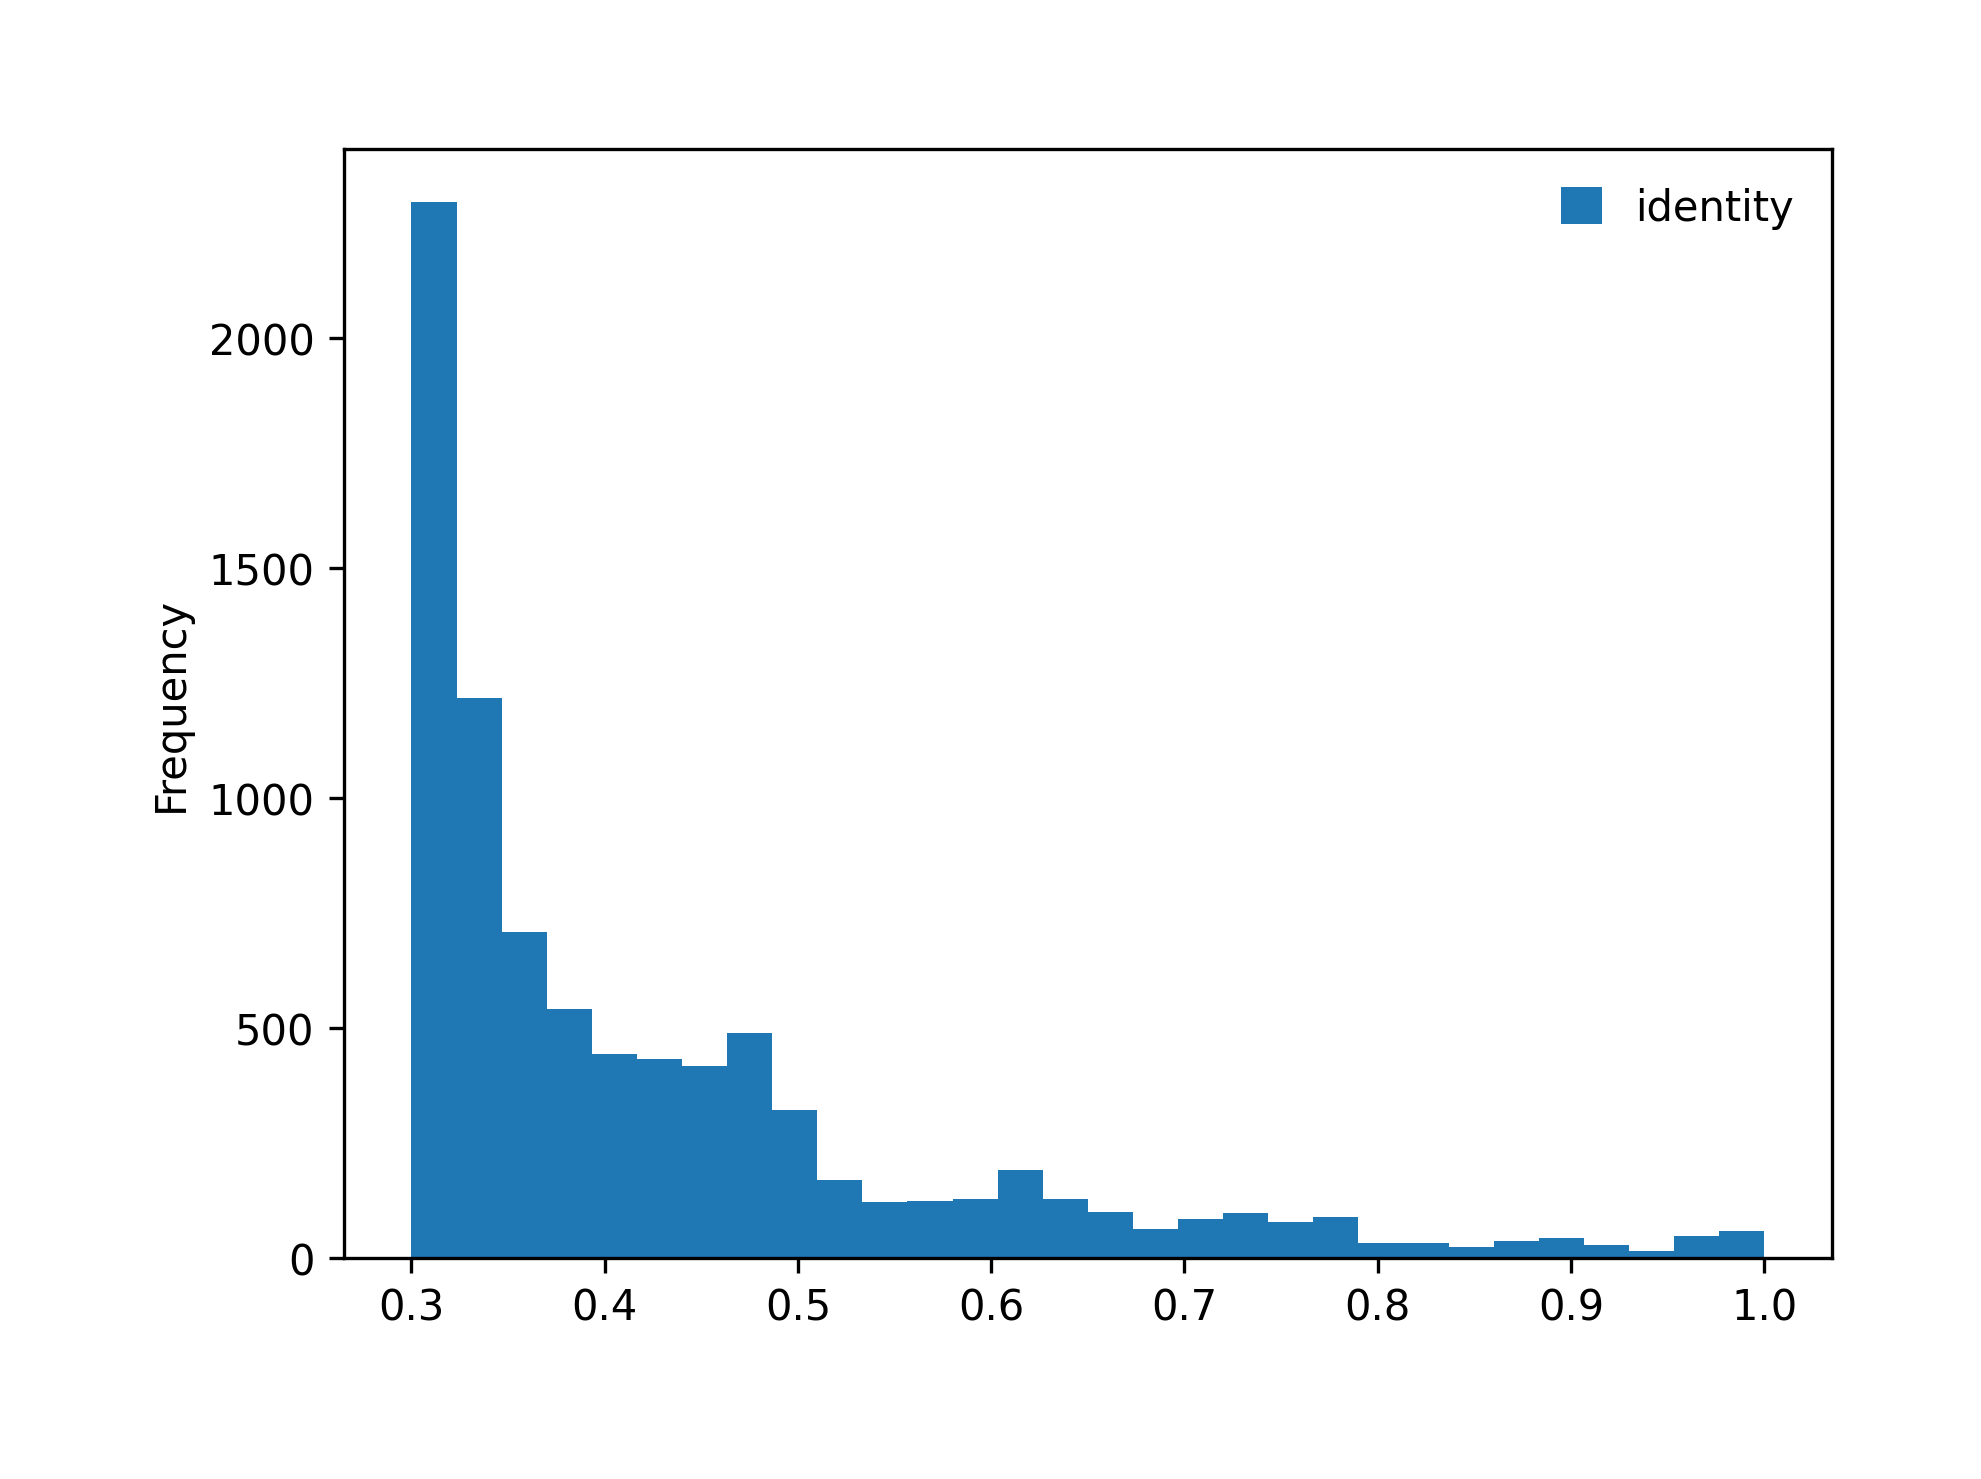

In [224]:
df = nx.to_pandas_edgelist(G_1)
df.plot.hist(column=['identity'], bins=30)

<Axes: ylabel='Frequency'>

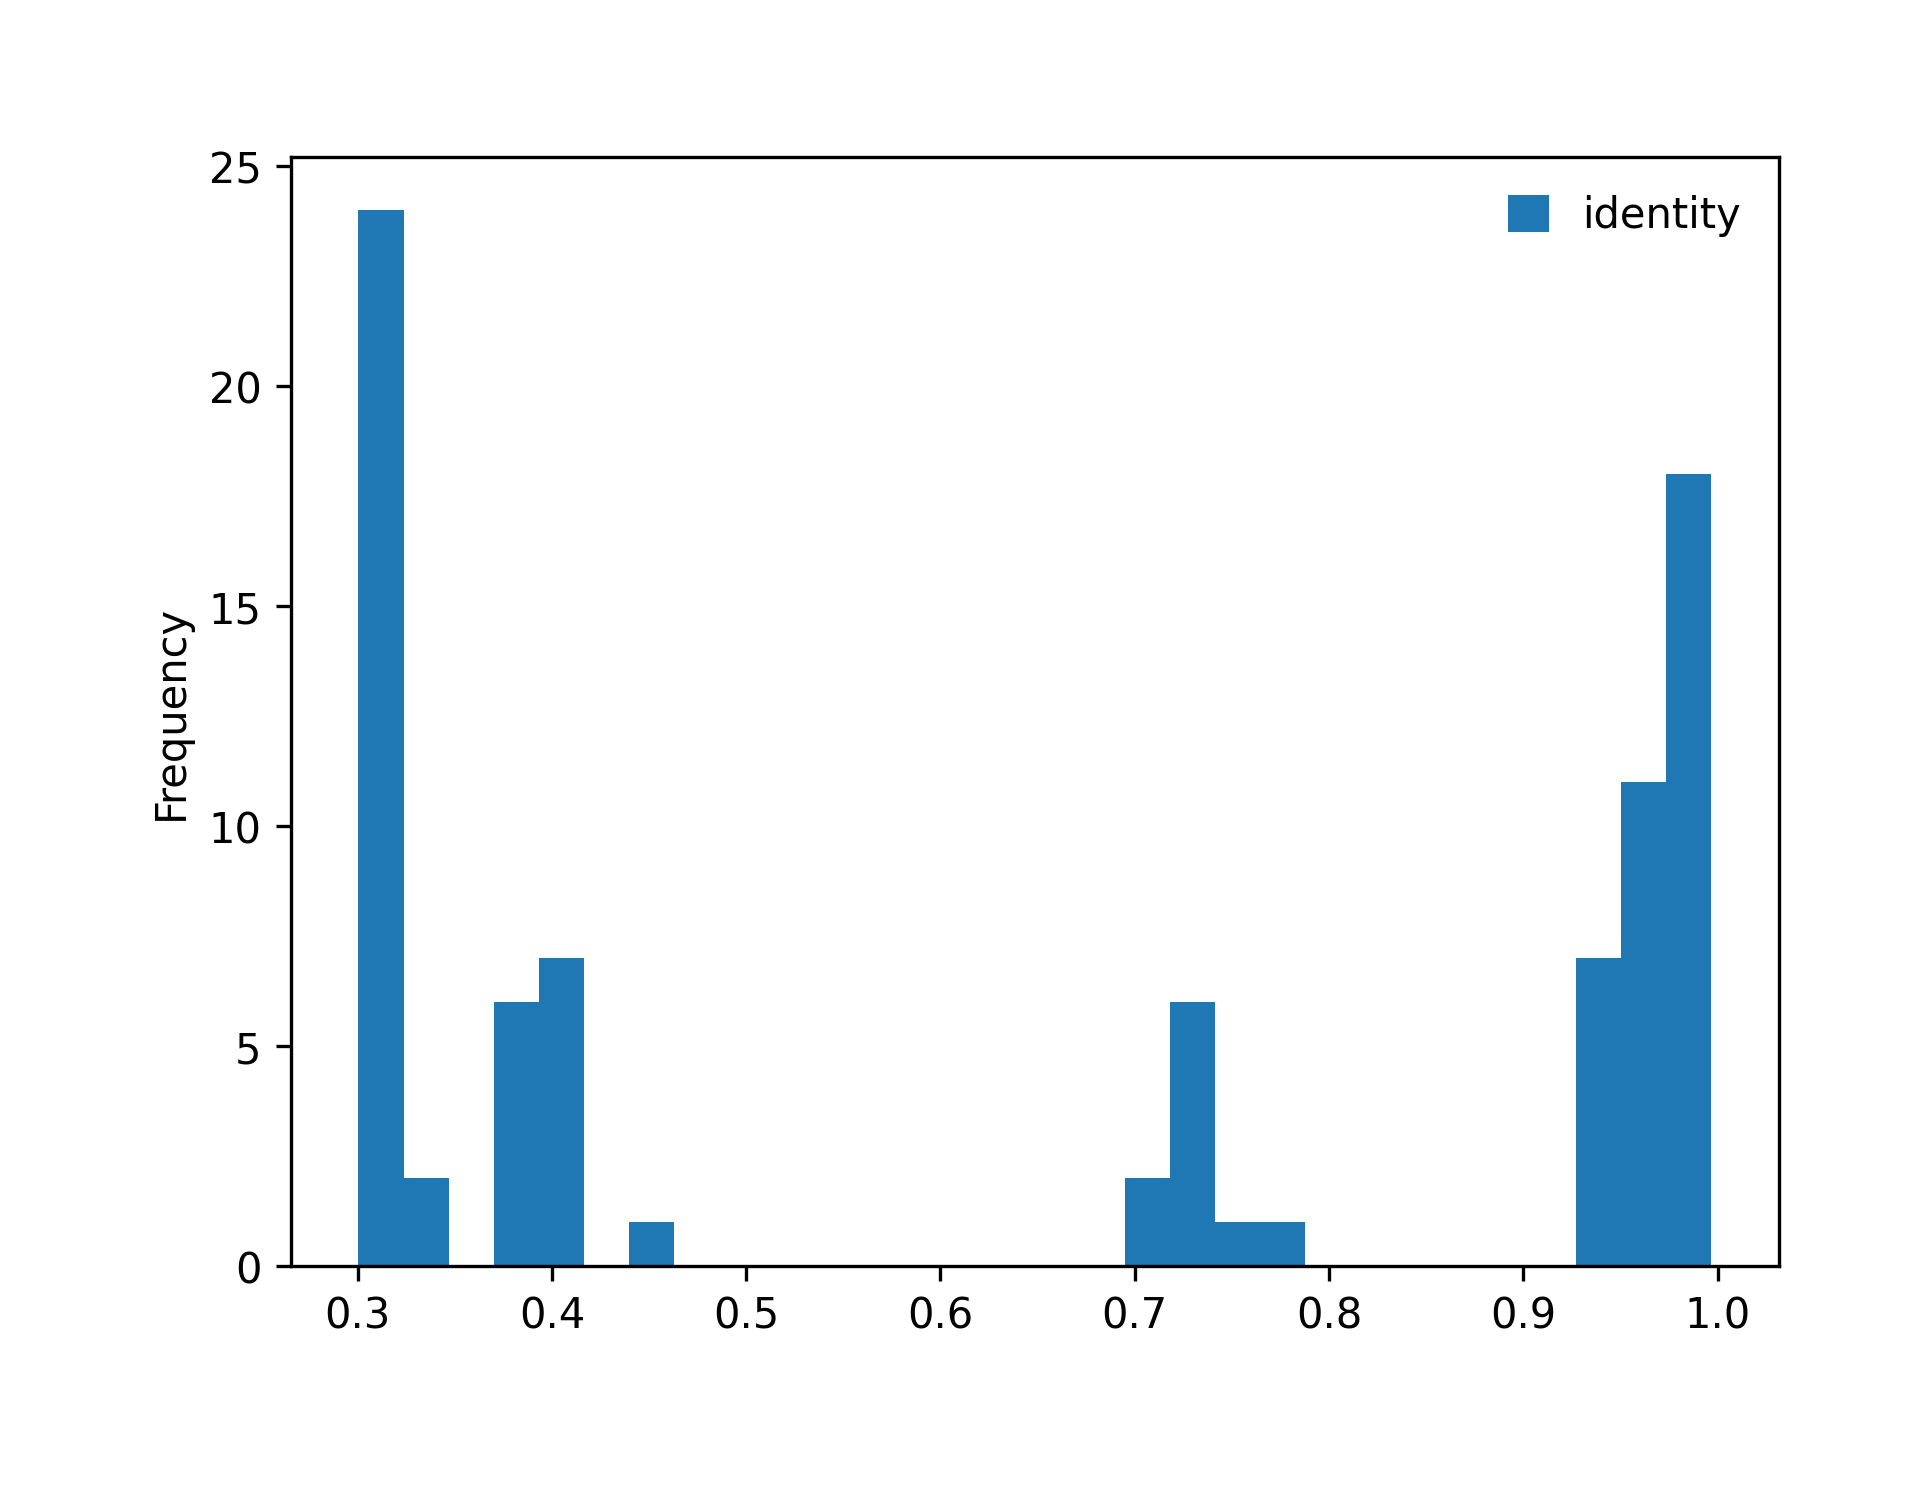

In [225]:
df = nx.to_pandas_edgelist(G_2)
df.plot.hist(column=['identity'], bins=30)

<Axes: ylabel='Frequency'>

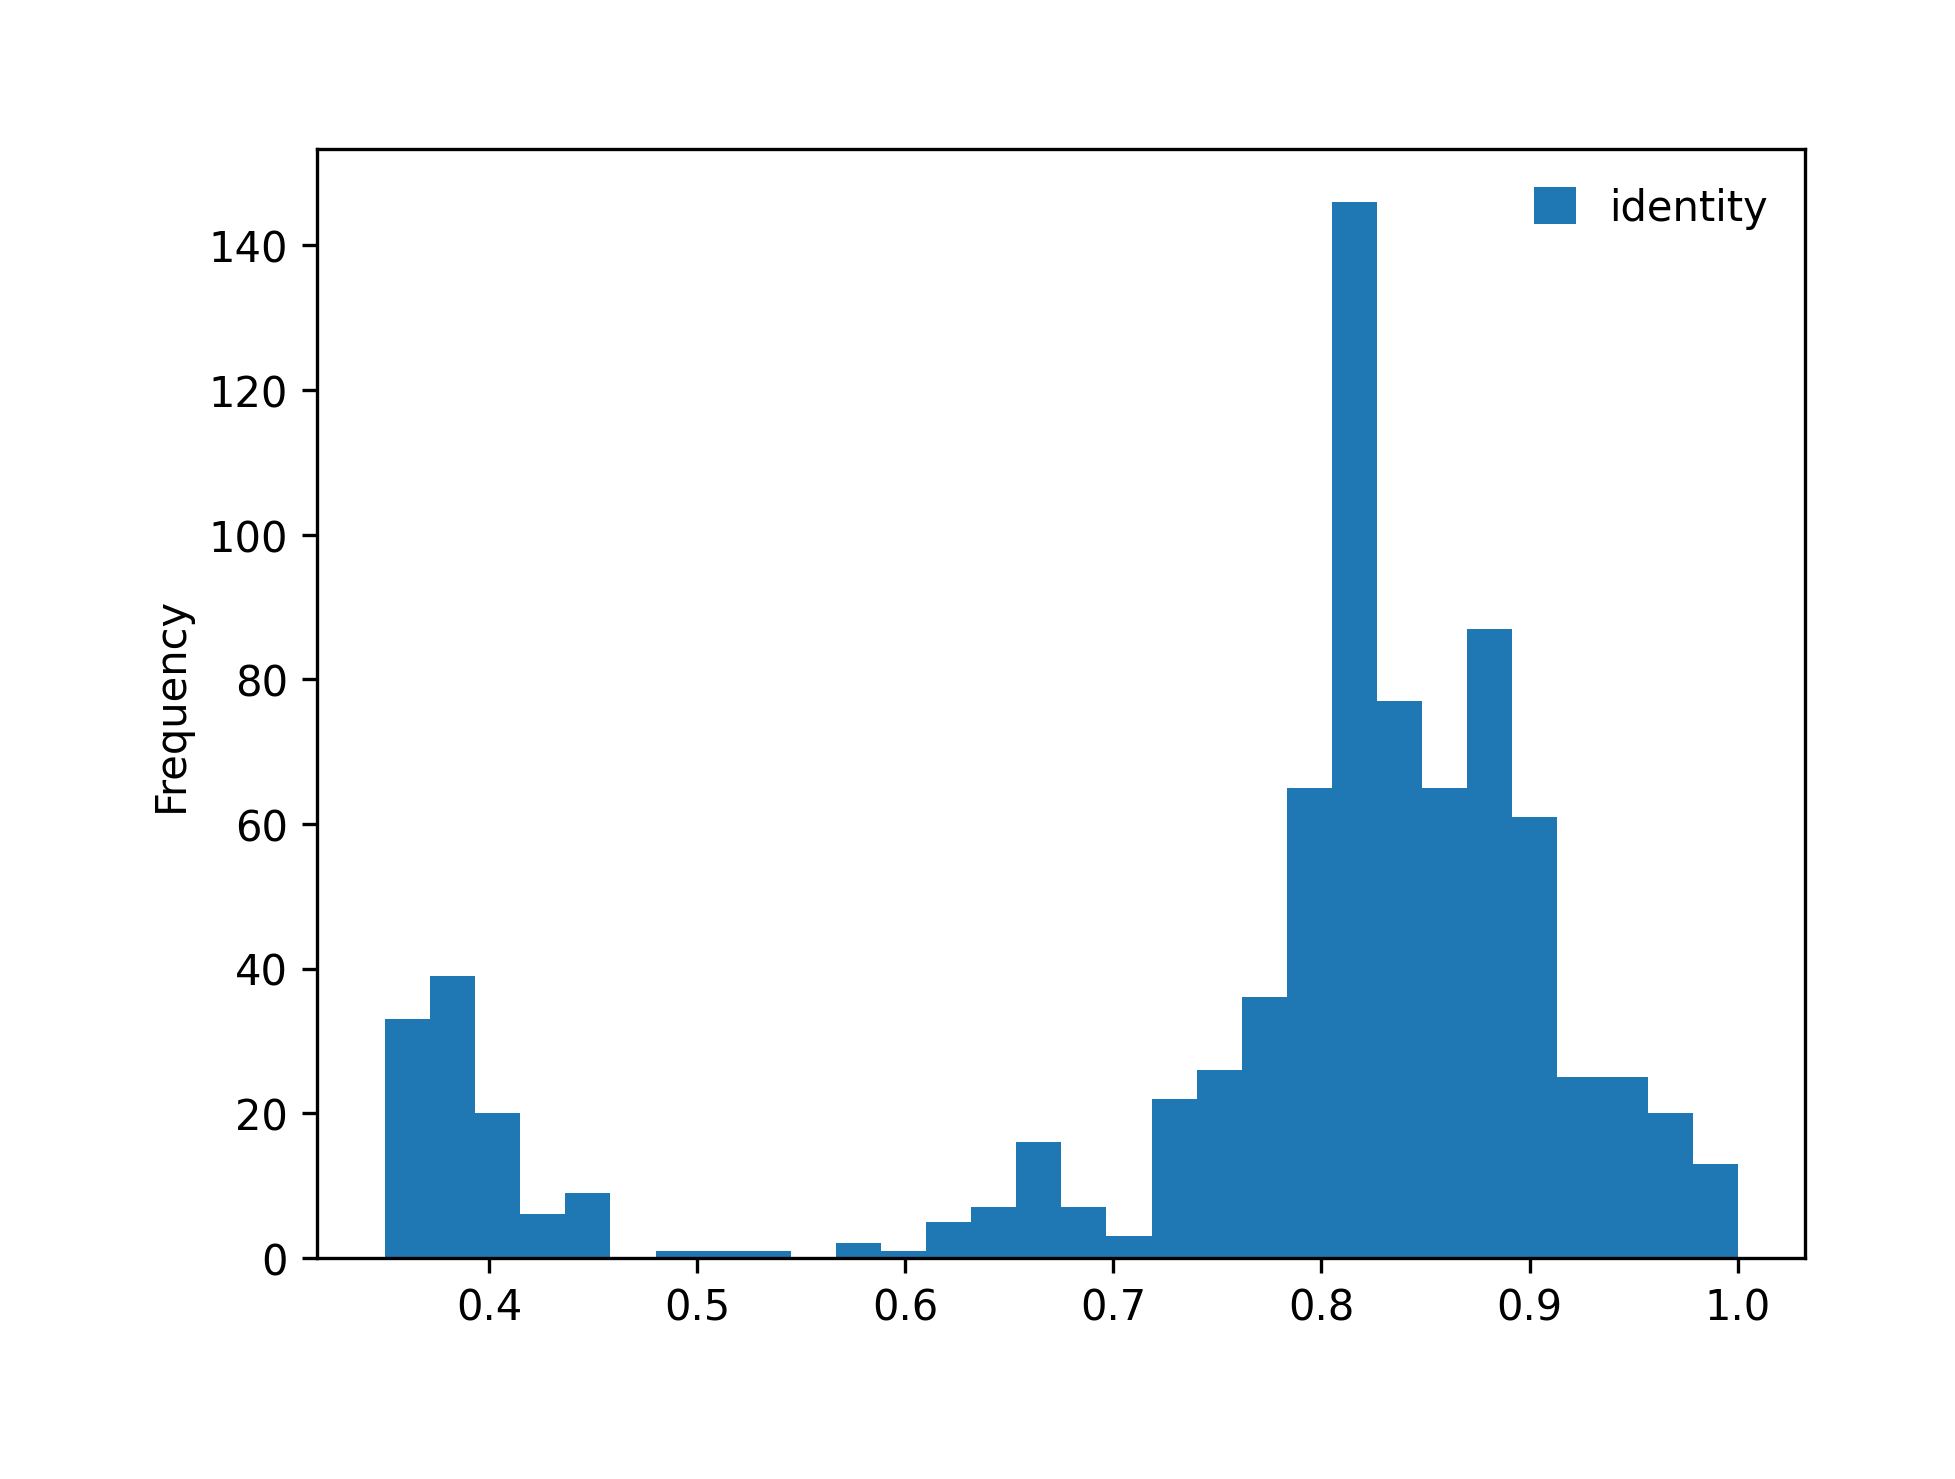

In [226]:
df = nx.to_pandas_edgelist(G_3)
df.plot.hist(column=['identity'], bins=30)

<Axes: ylabel='Frequency'>

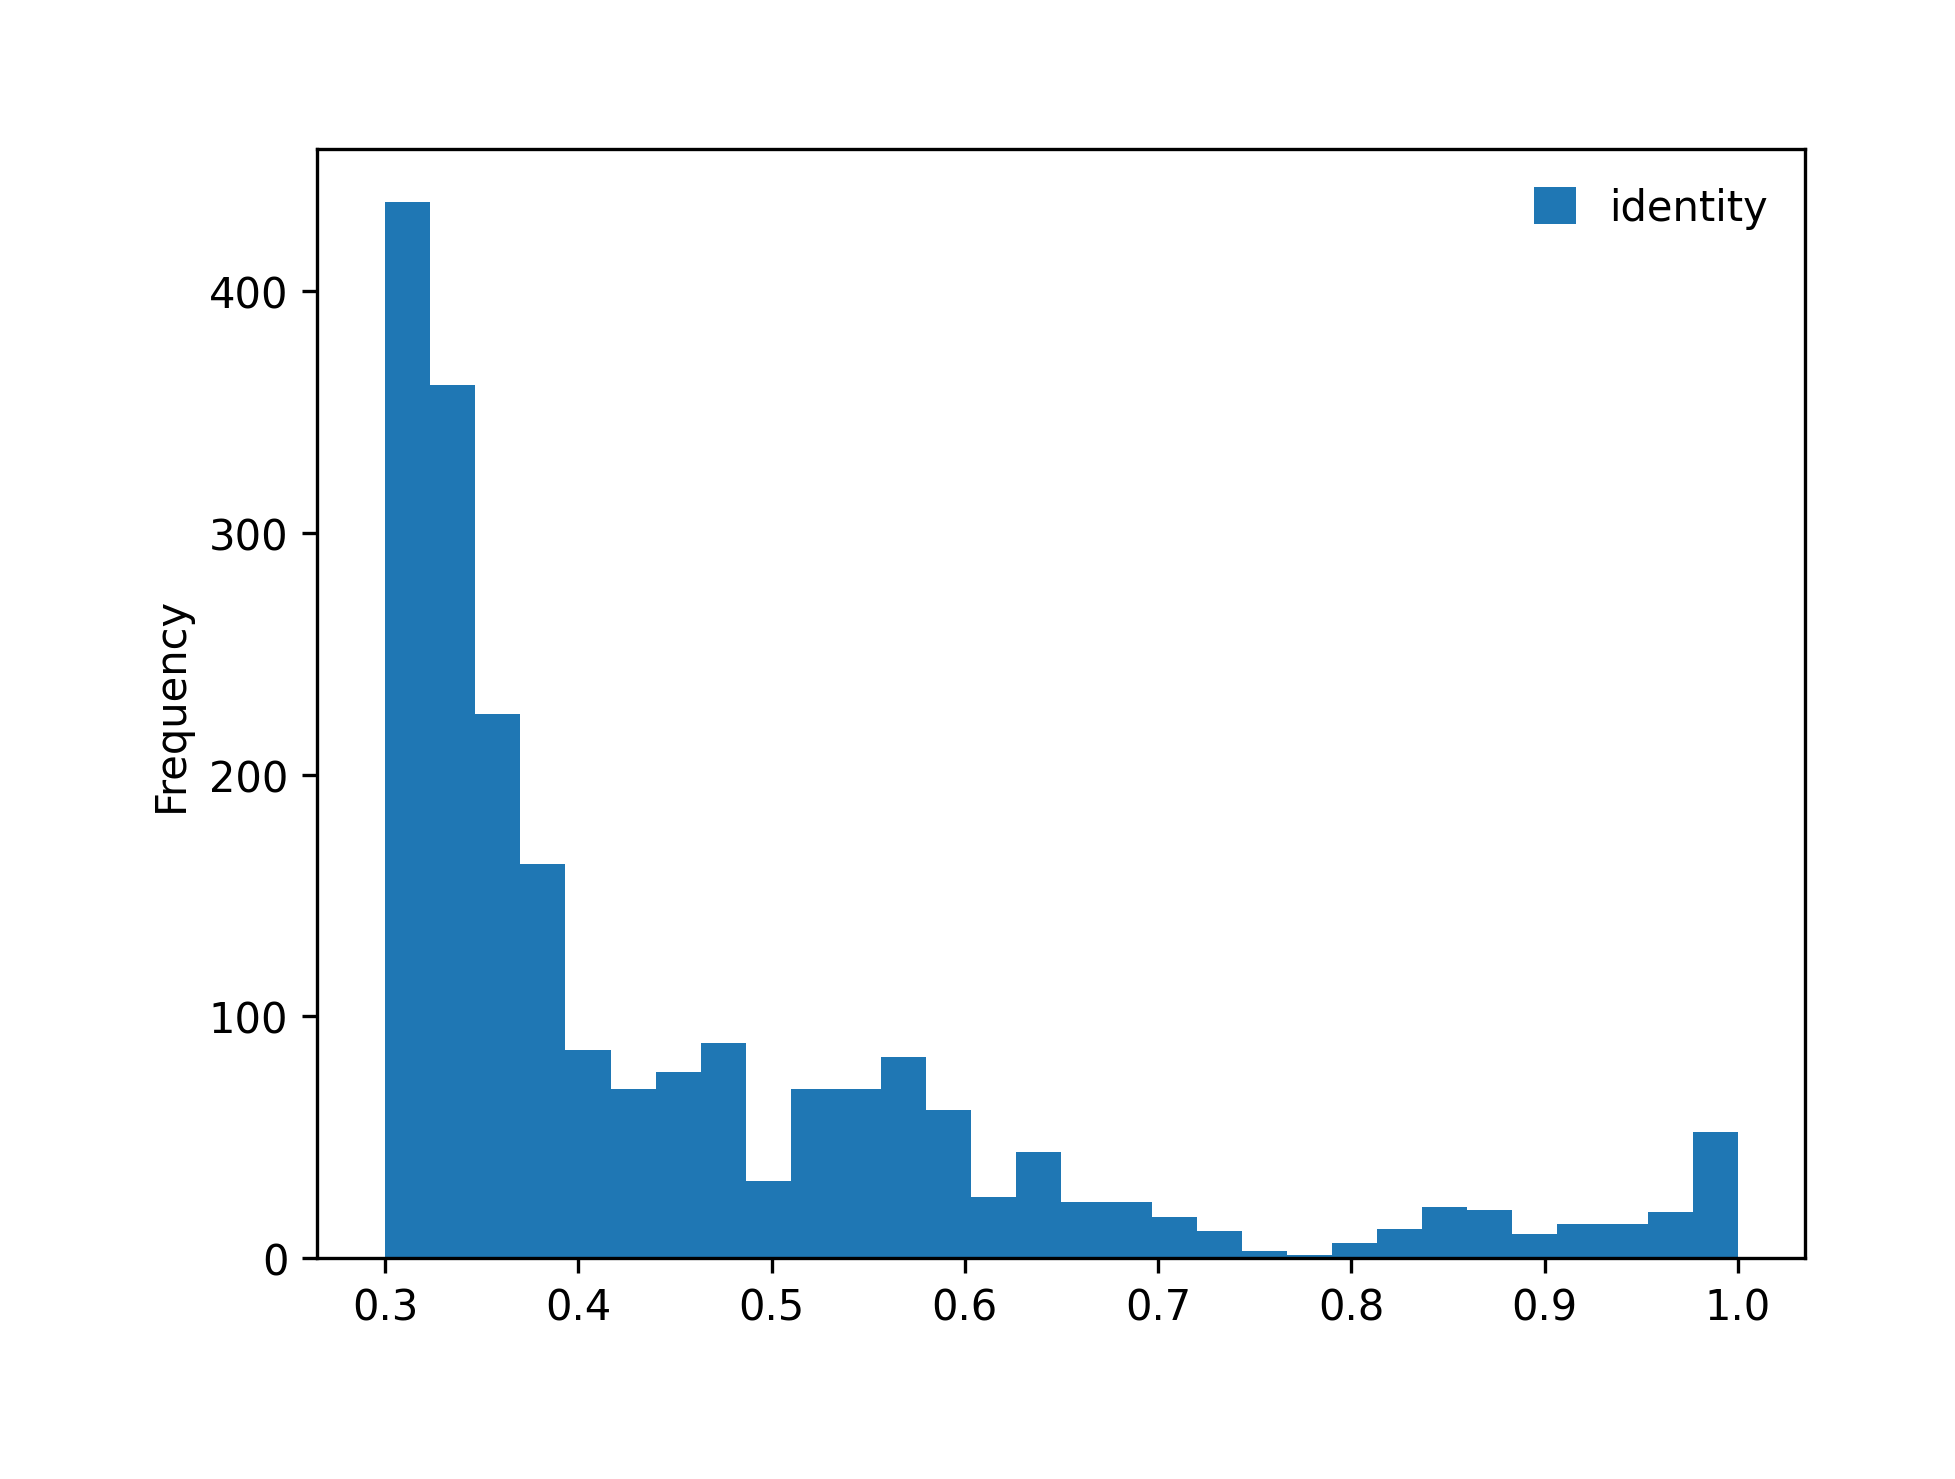

In [227]:
df = nx.to_pandas_edgelist(G_4)
df.plot.hist(column=['identity'], bins=30)

<Axes: ylabel='Frequency'>

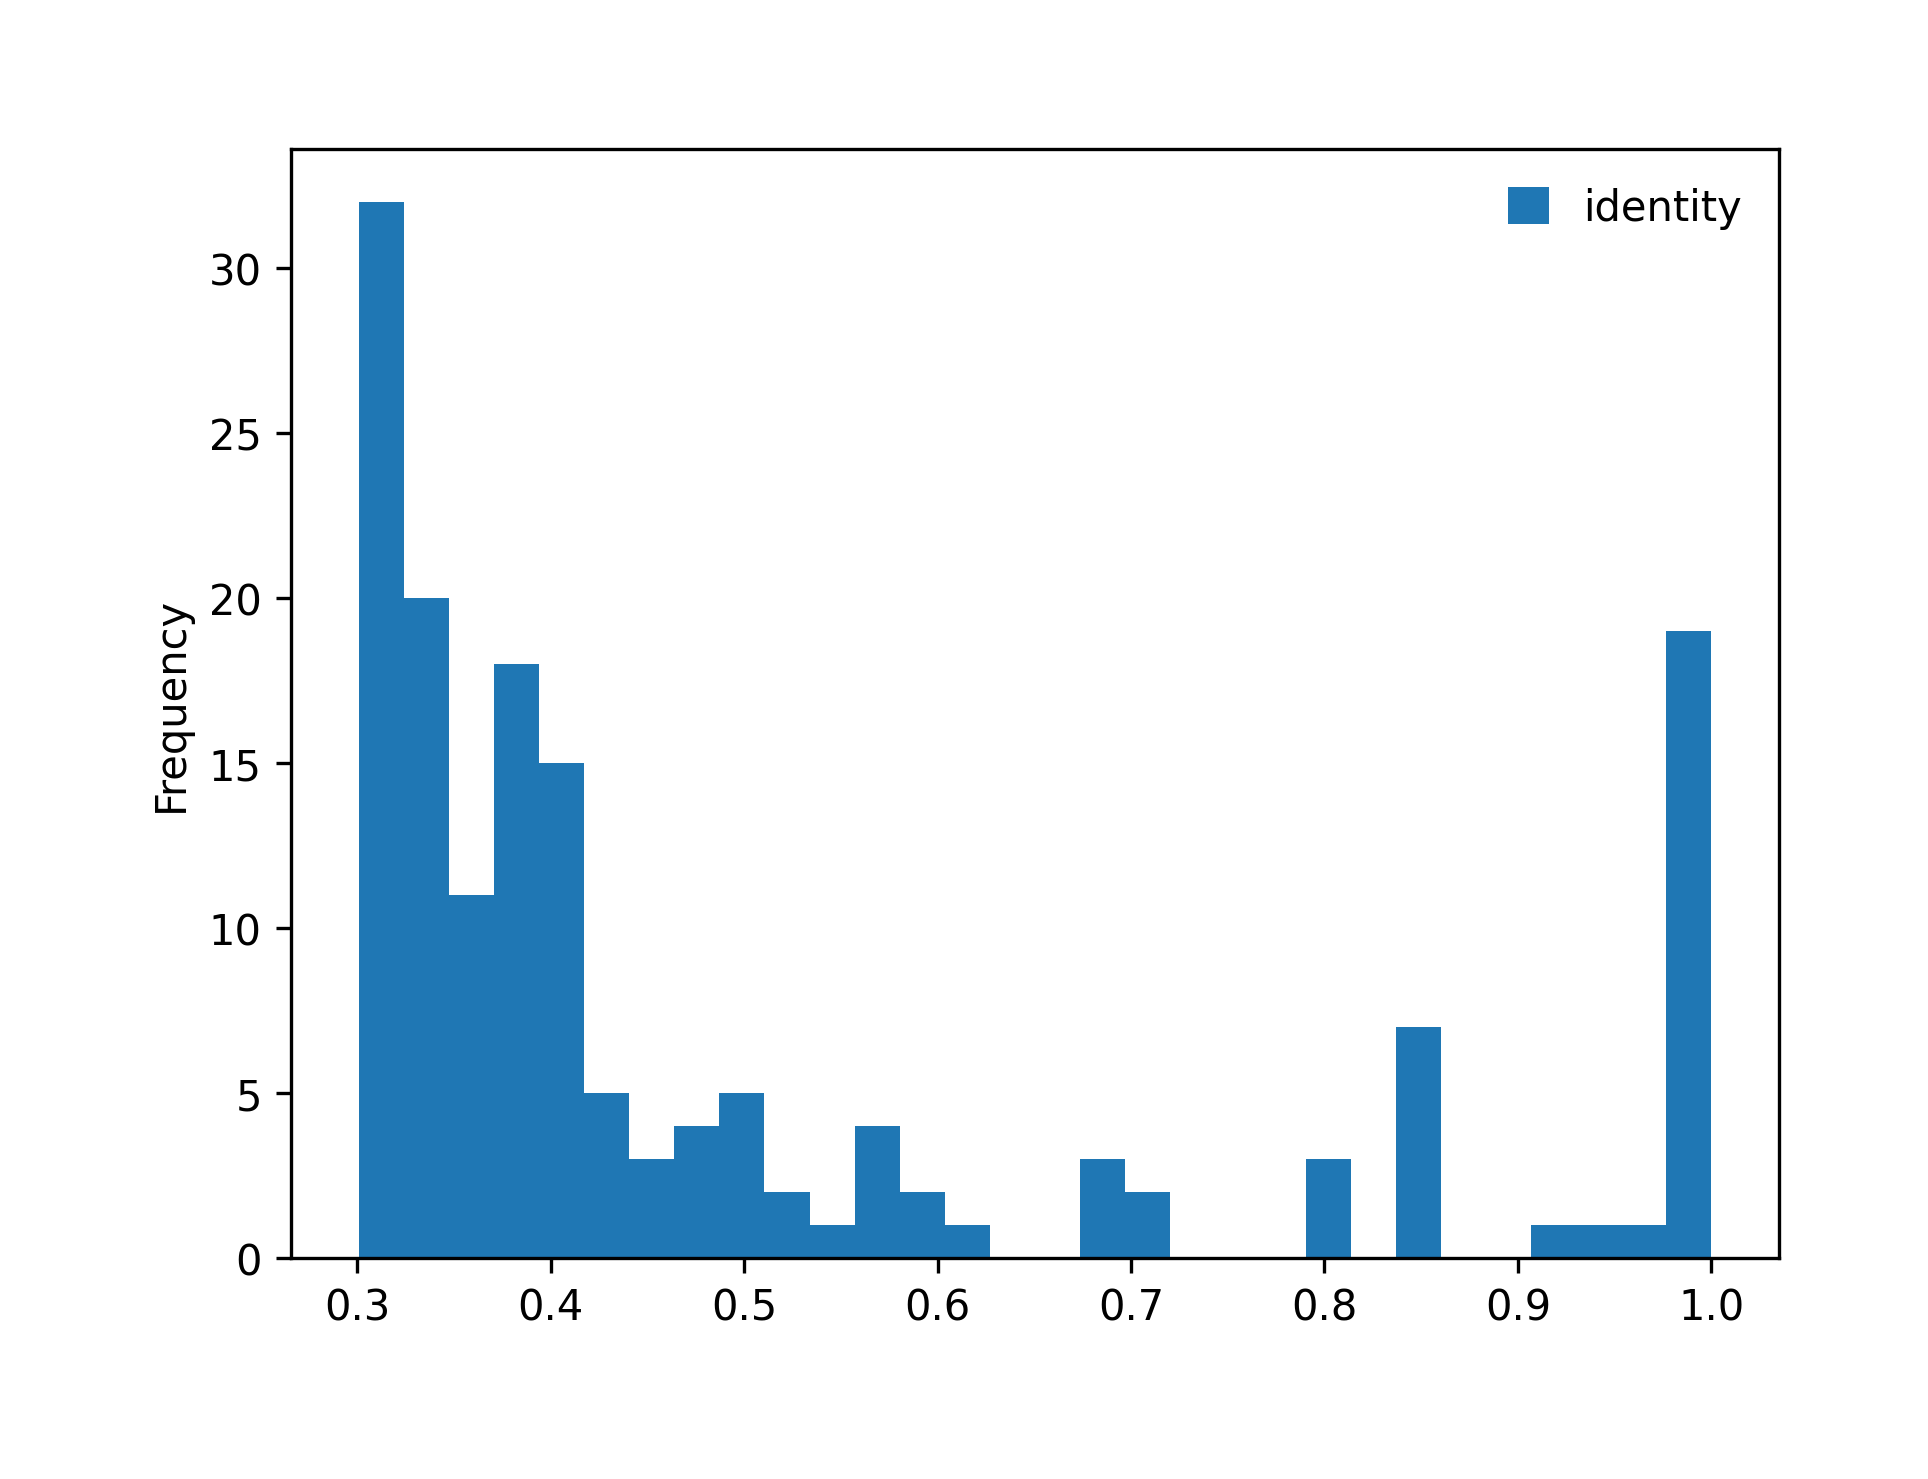

In [228]:
df = nx.to_pandas_edgelist(G_5)
df.plot.hist(column=['identity'], bins=30)

<Axes: ylabel='Frequency'>

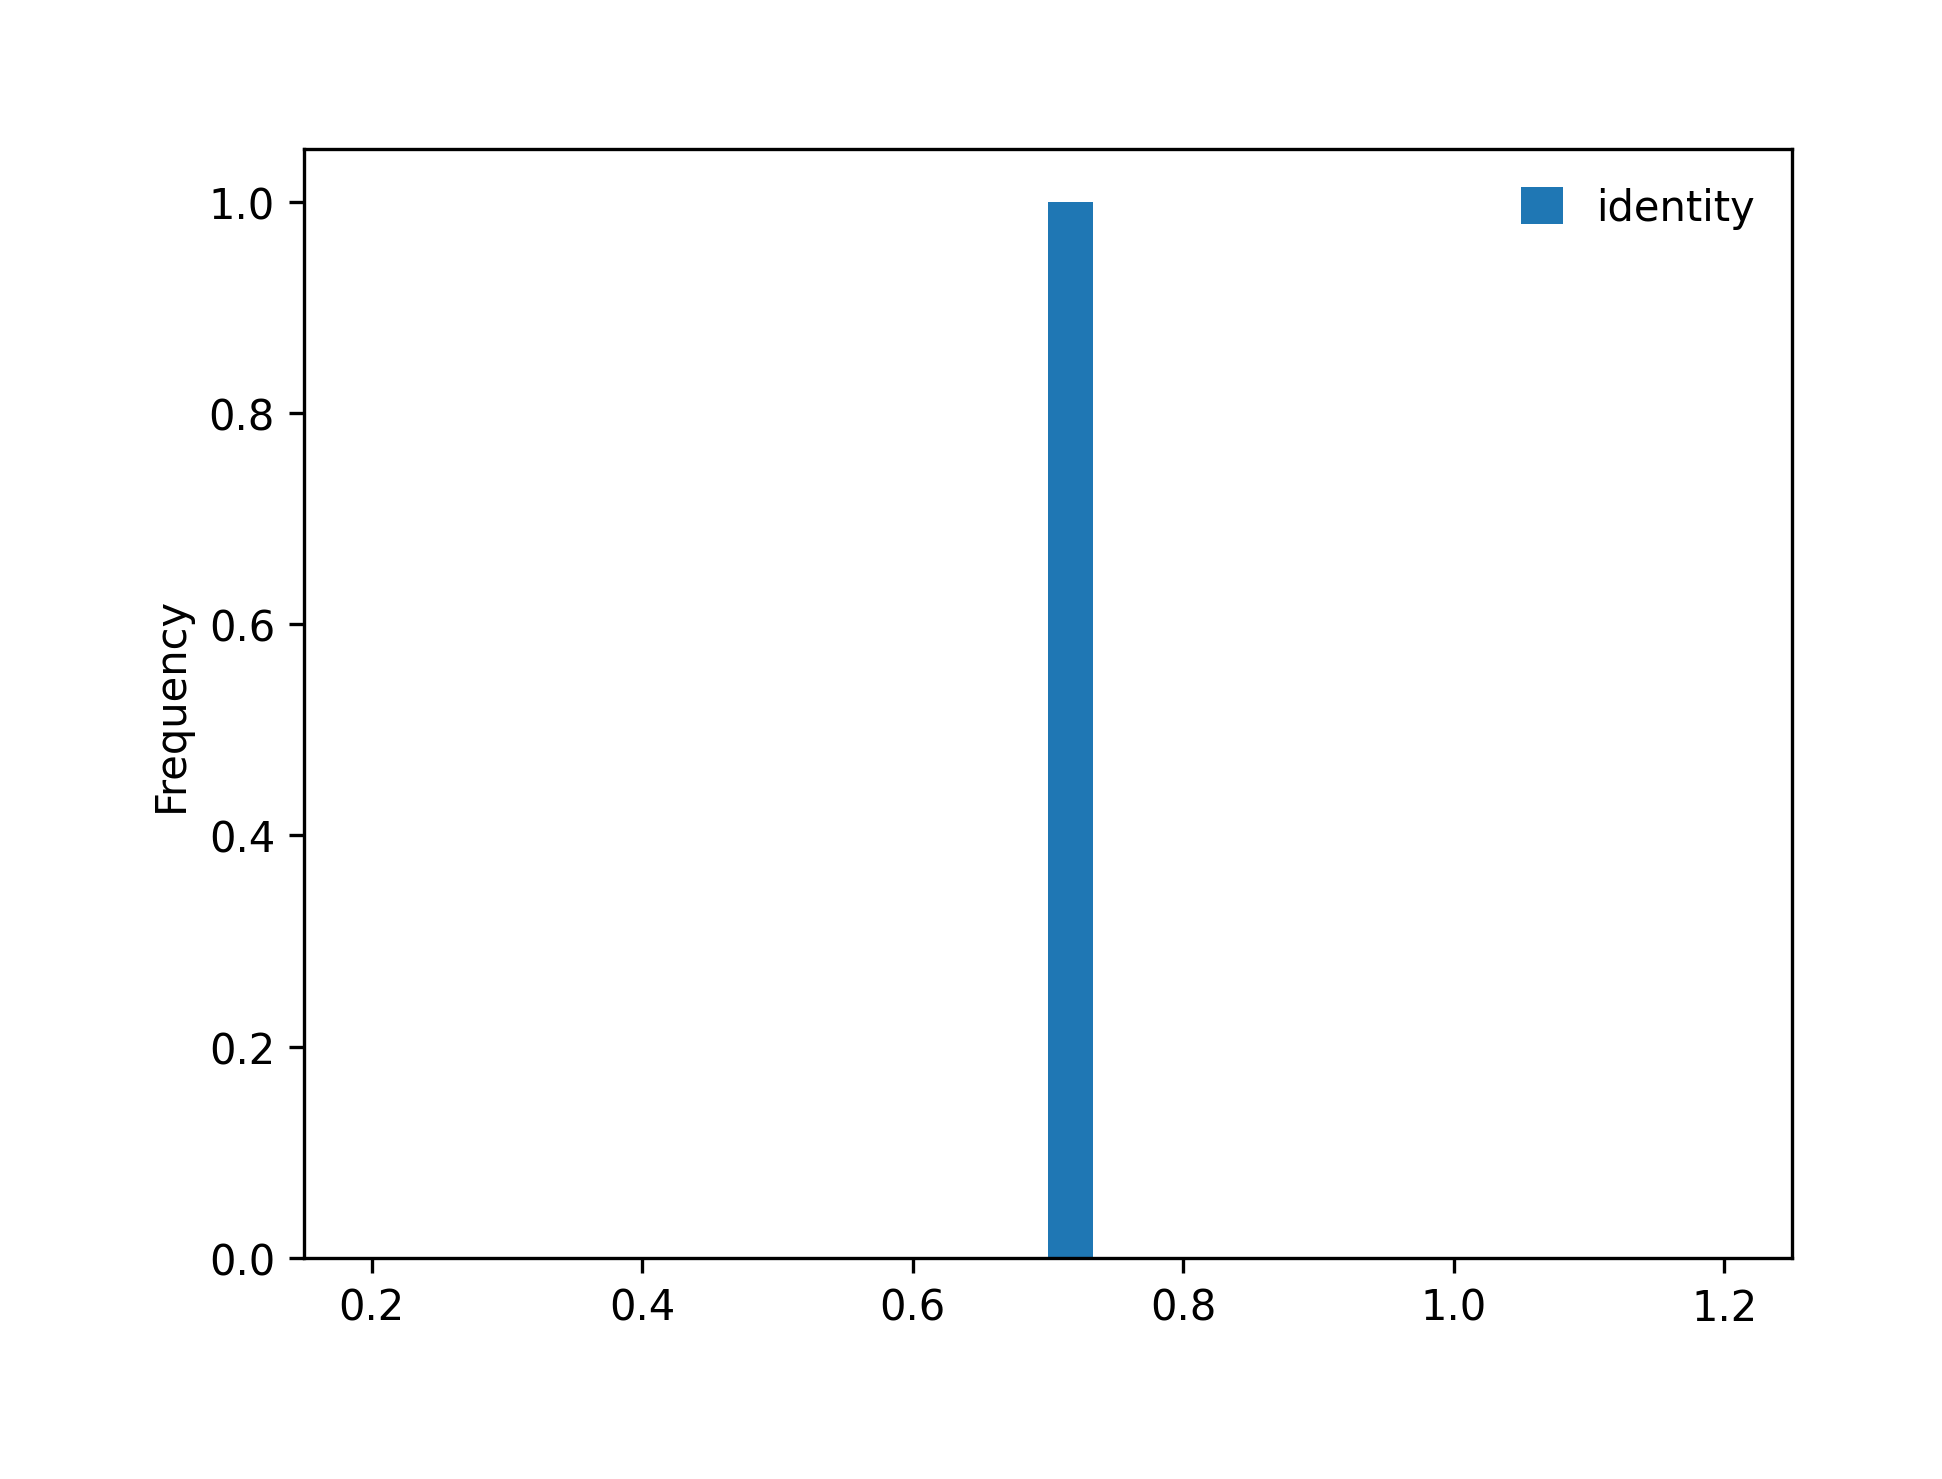

In [229]:
df = nx.to_pandas_edgelist(G_6)
df.plot.hist(column=['identity'], bins=30)

<Axes: ylabel='Frequency'>

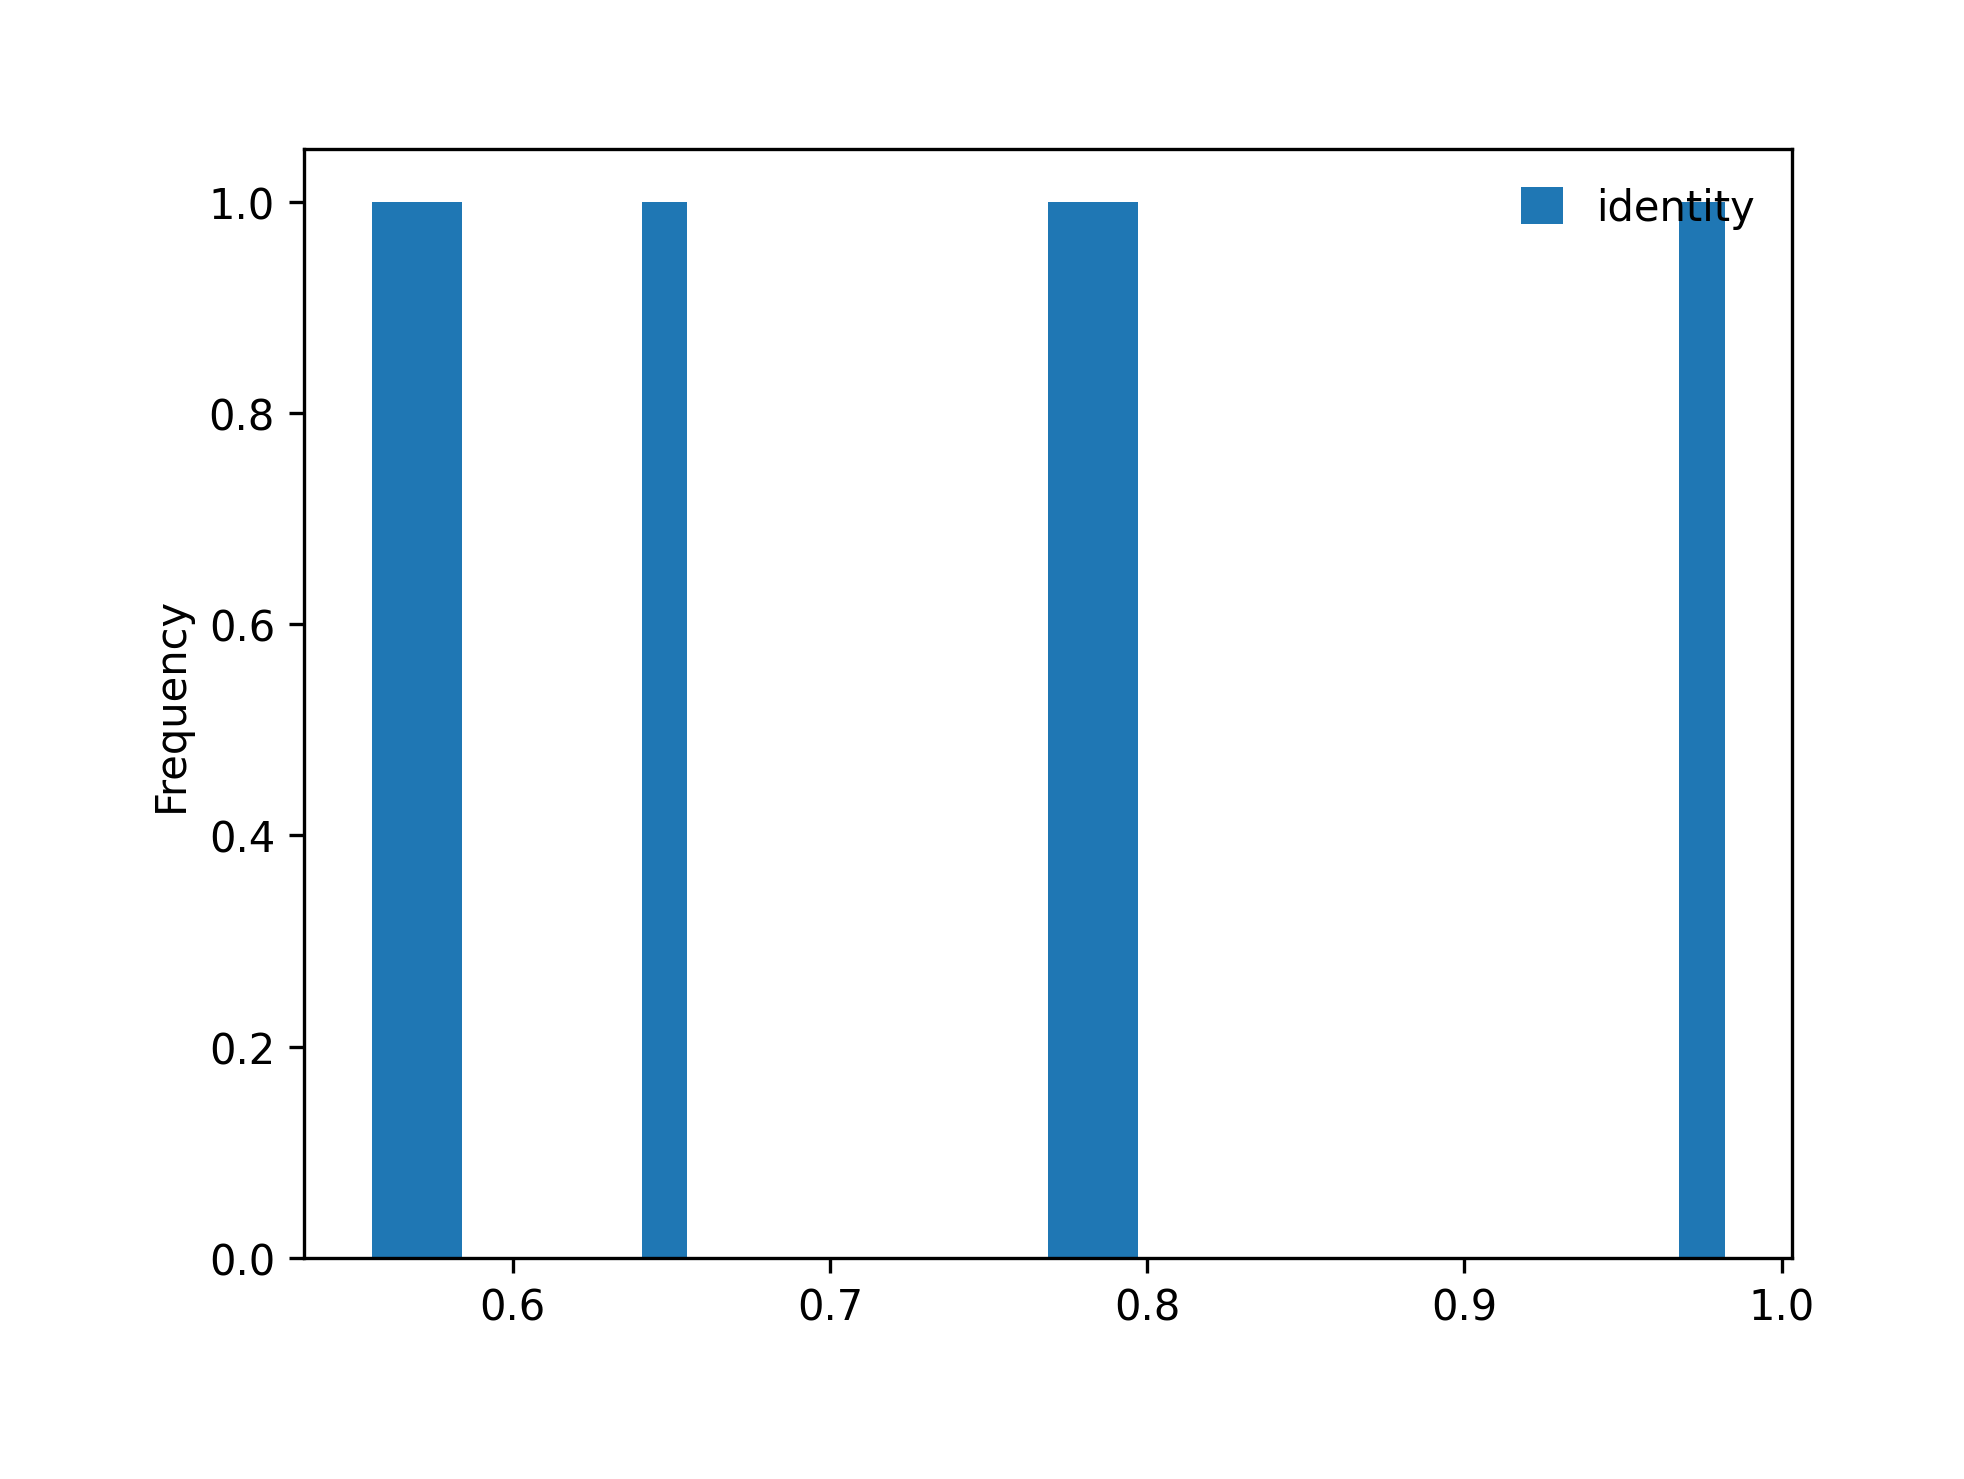

In [230]:
df = nx.to_pandas_edgelist(G_7)
df.plot.hist(column=['identity'], bins=30)

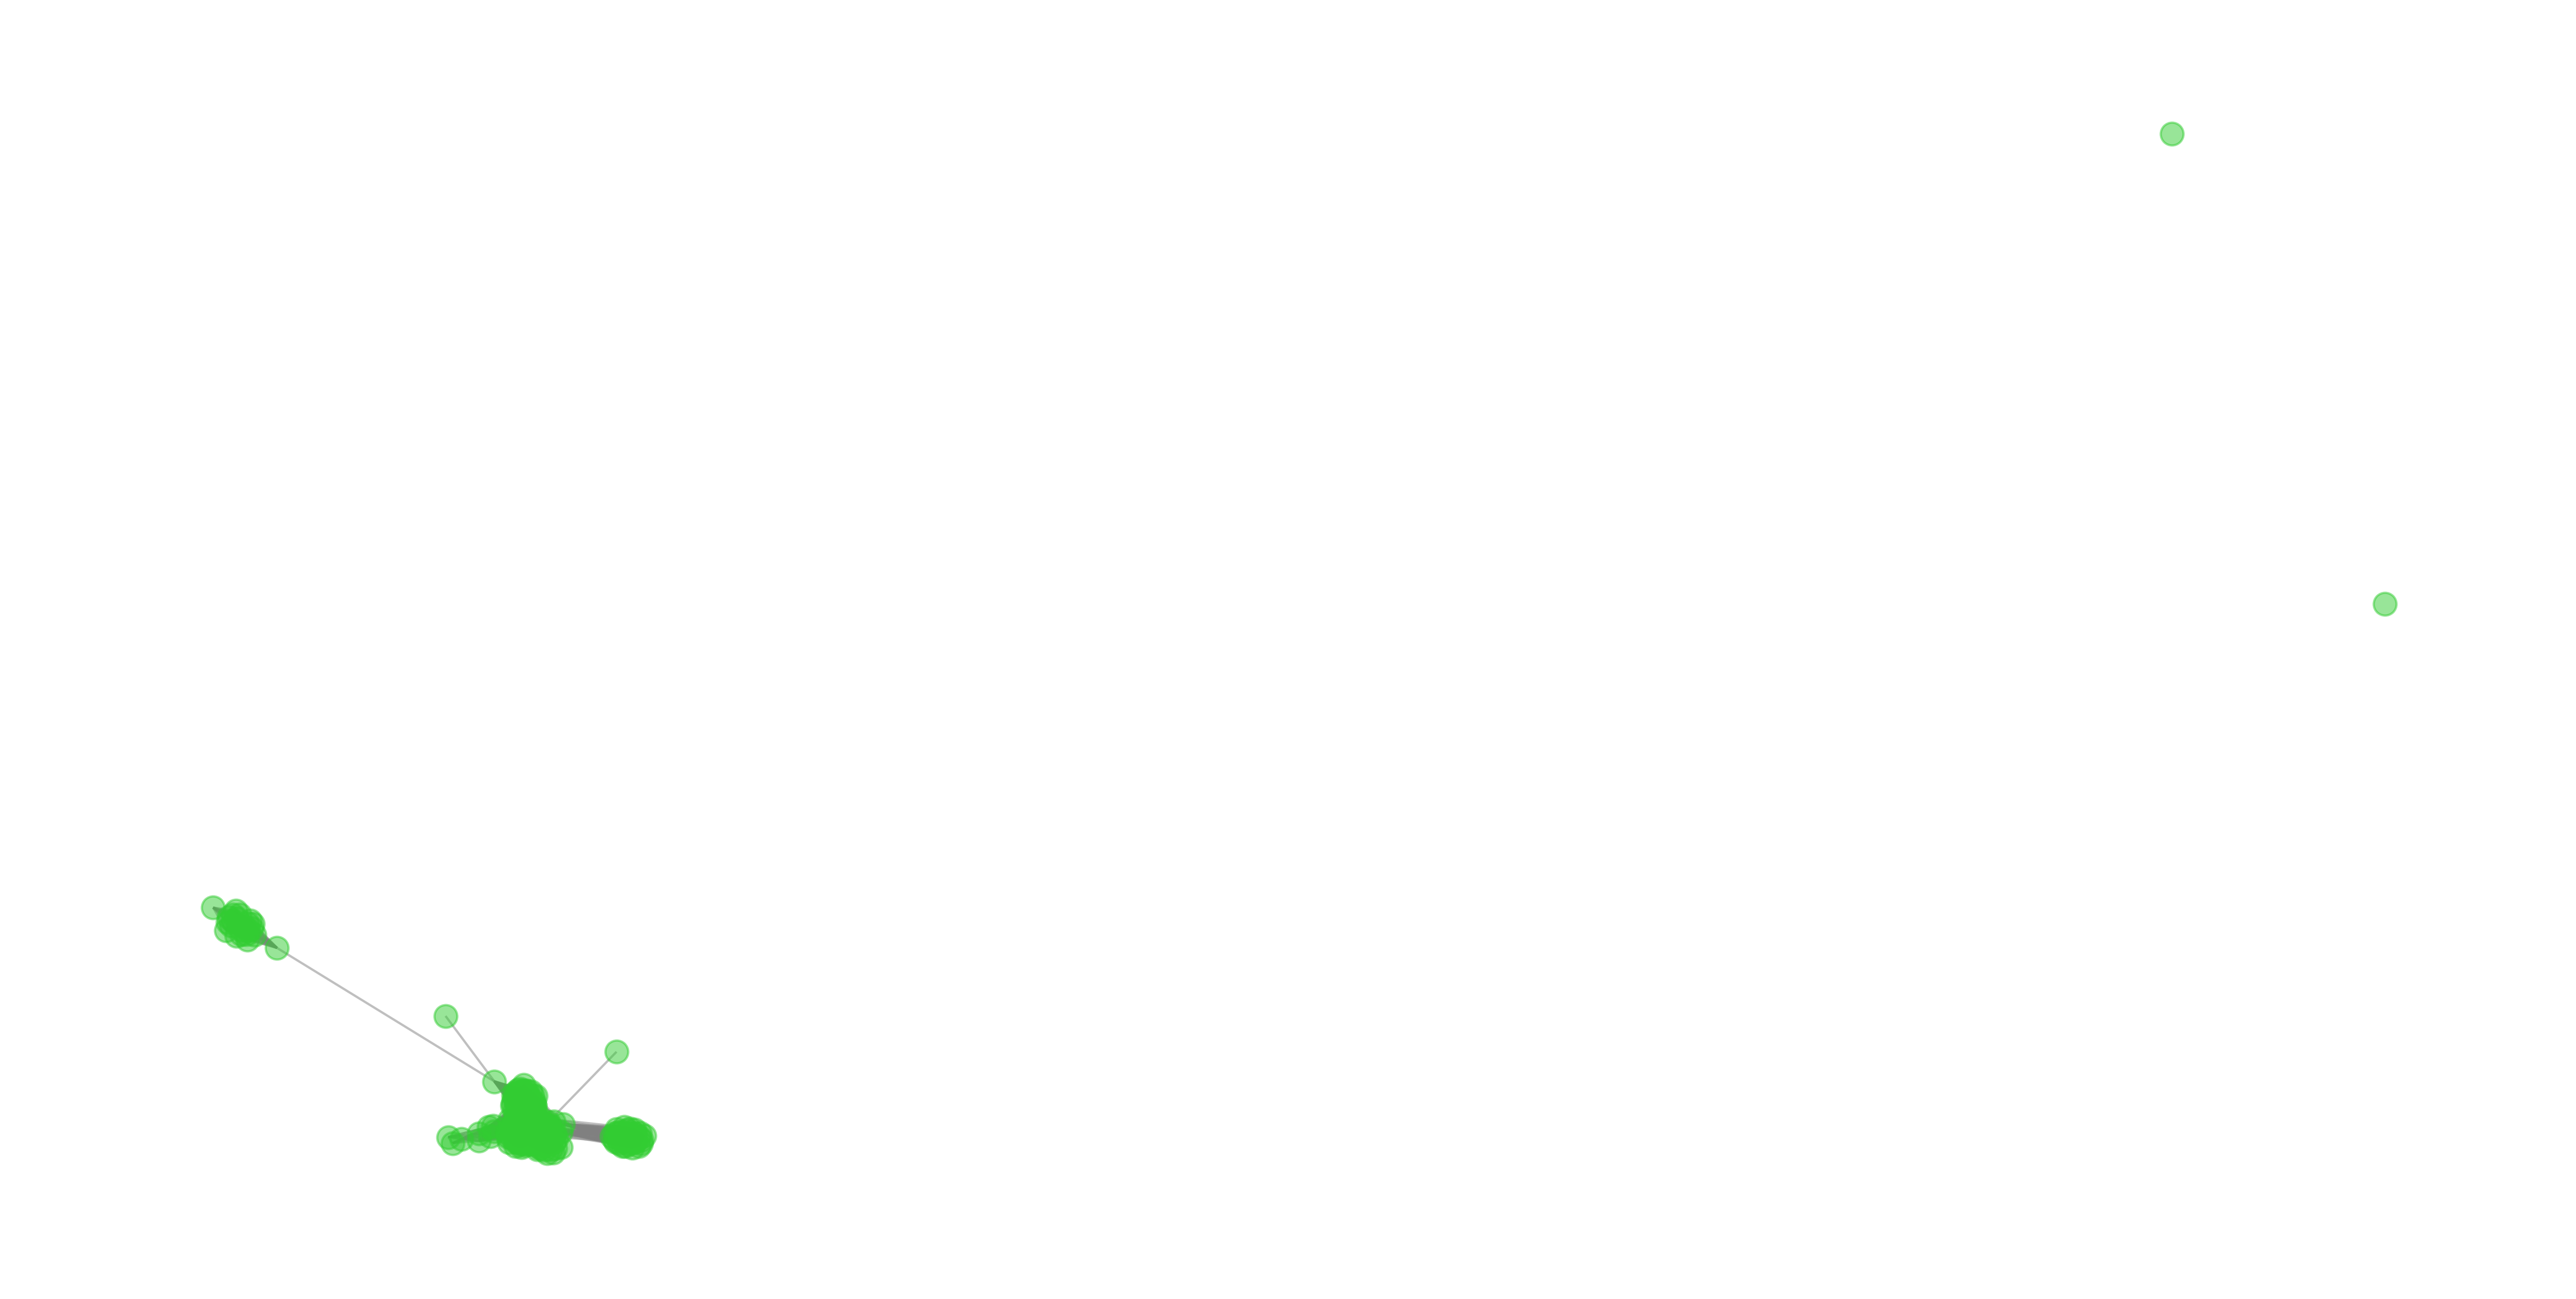

In [187]:
pos = nx.spring_layout(G_1, weight='identity', iterations=200, seed=18)
plt.figure(figsize=(19,9))
nx.draw_networkx(G_1, pos=pos, with_labels=False, node_size=100, node_color = "limegreen", font_color='Black',font_size='6', font_weight='bold', edge_color='grey', alpha=0.5, width=1)
plt.axis('off')

plt.show()

In [188]:
for protein in old_proteins: 
    if protein.id == "EAU47024.1": 
        target = protein

network_1.add_to_targets(target)

In [189]:
#network_1.visualize_2d_network()

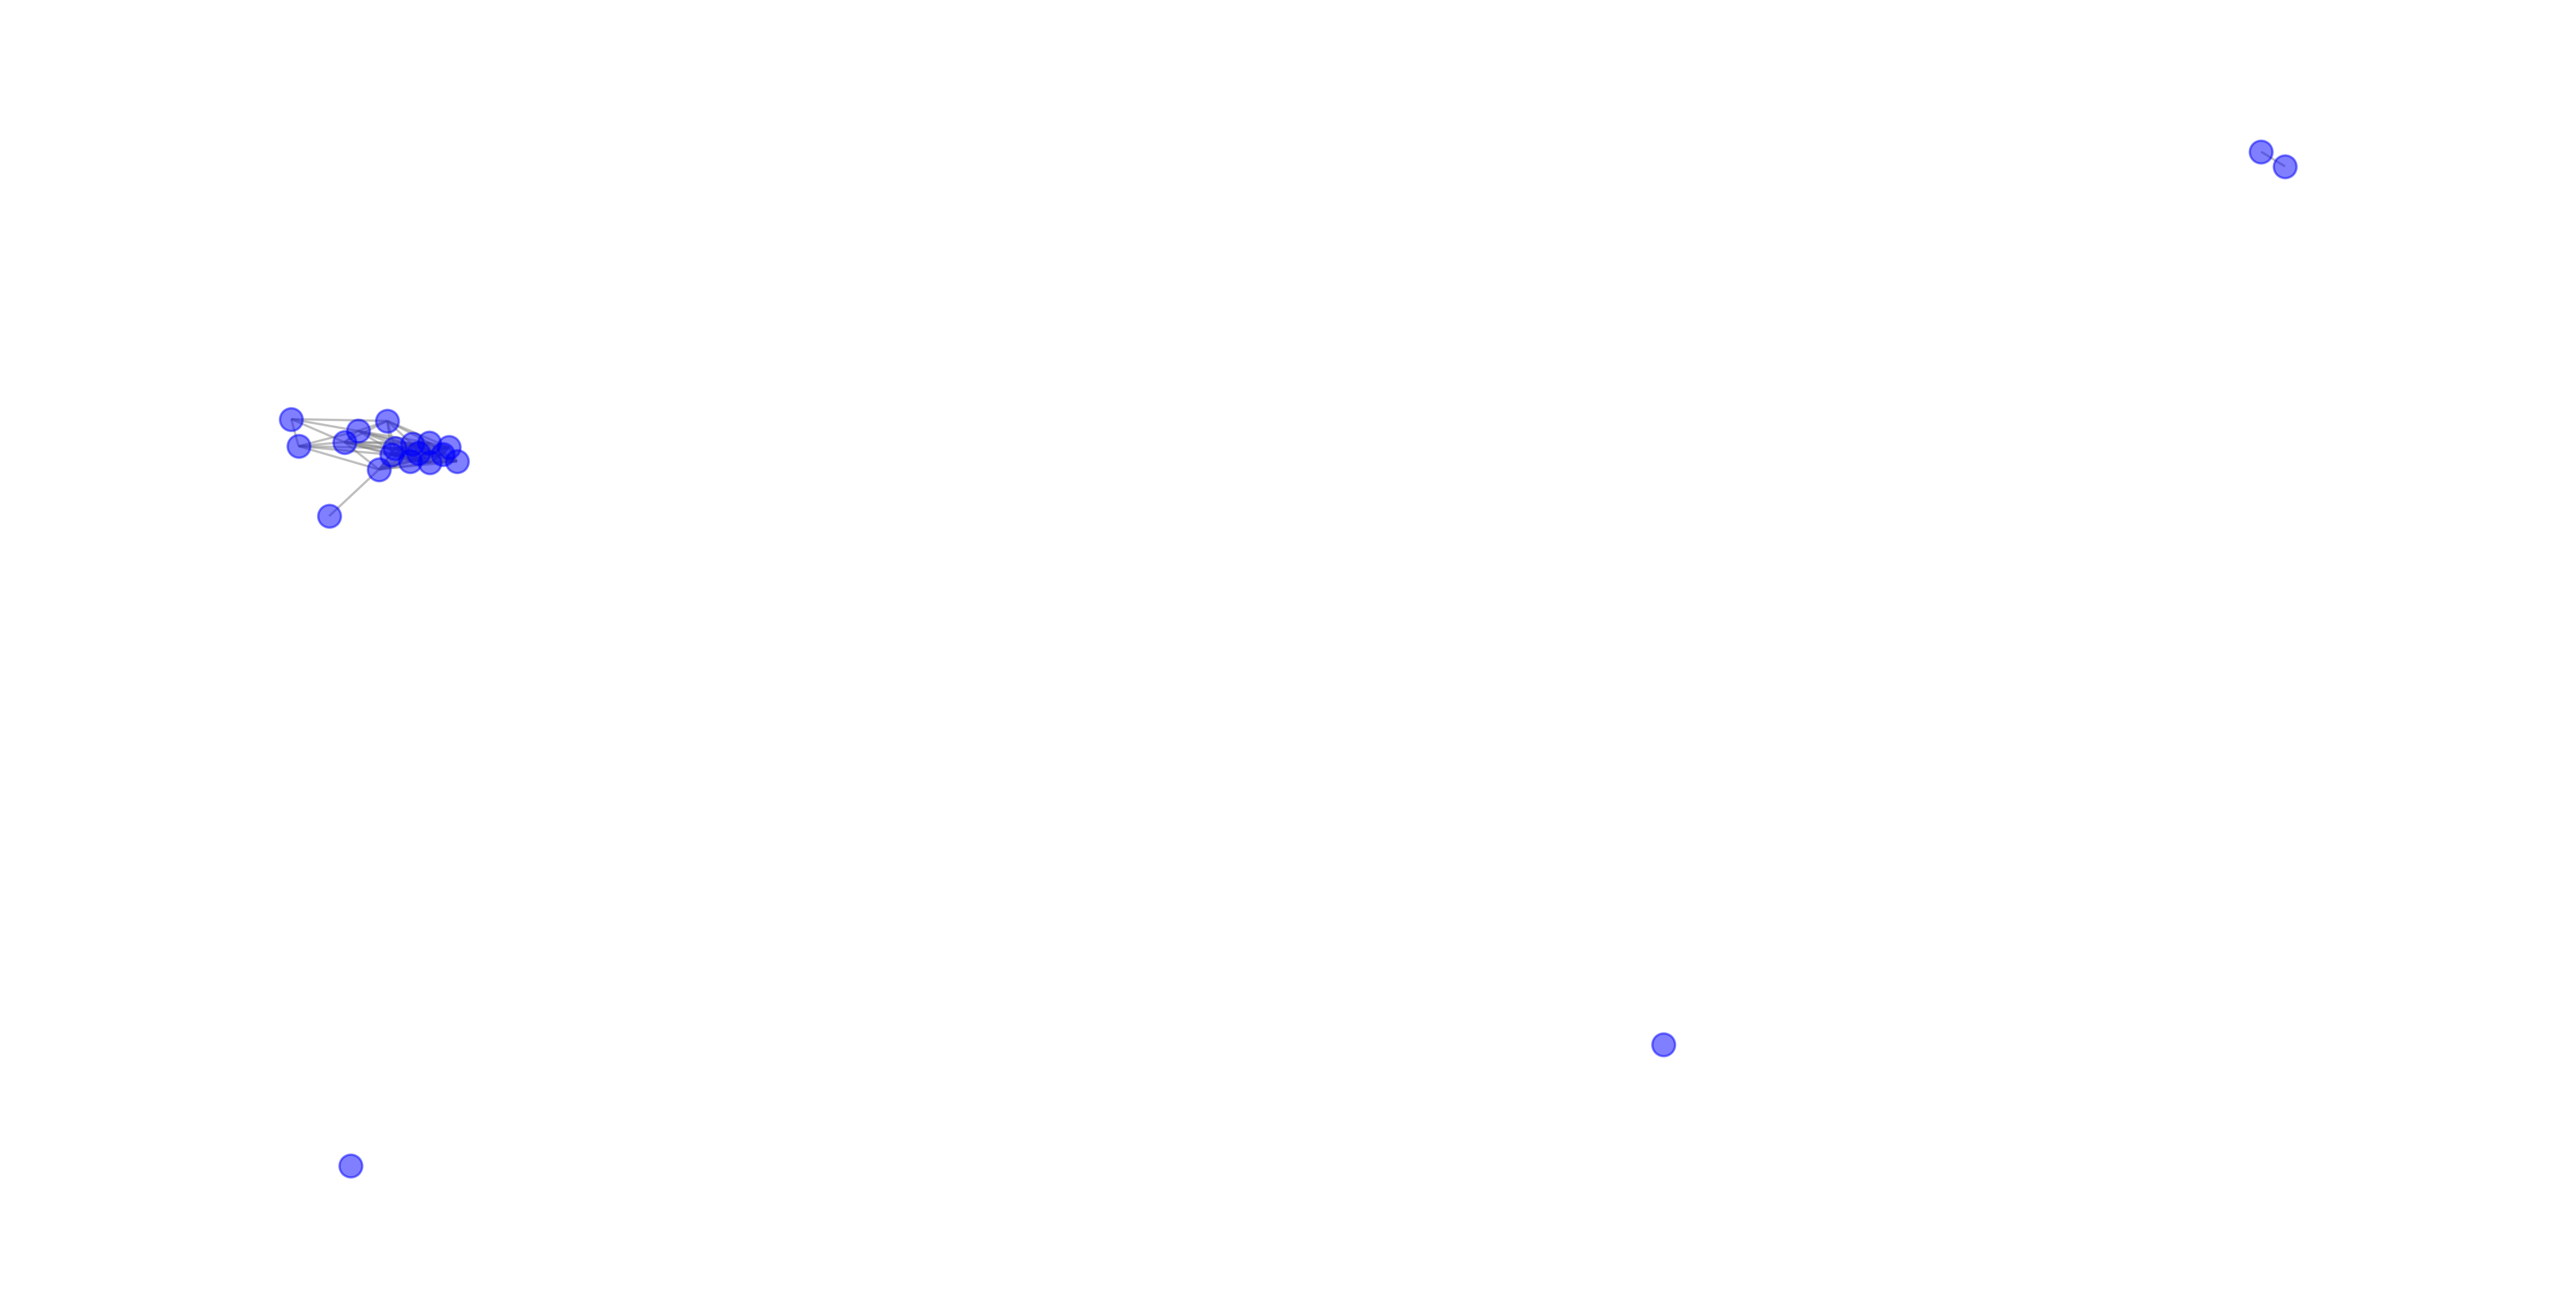

In [190]:
pos = nx.spring_layout(G_2, weight='identity', iterations=200, seed=18)
plt.figure(figsize=(19,9))
nx.draw_networkx(G_2, pos=pos, with_labels=False,  node_size=100, node_color="blue", font_color='Black',font_size='6', font_weight='bold', edge_color='grey', alpha=0.5, width=1)
plt.axis('off')

plt.show()

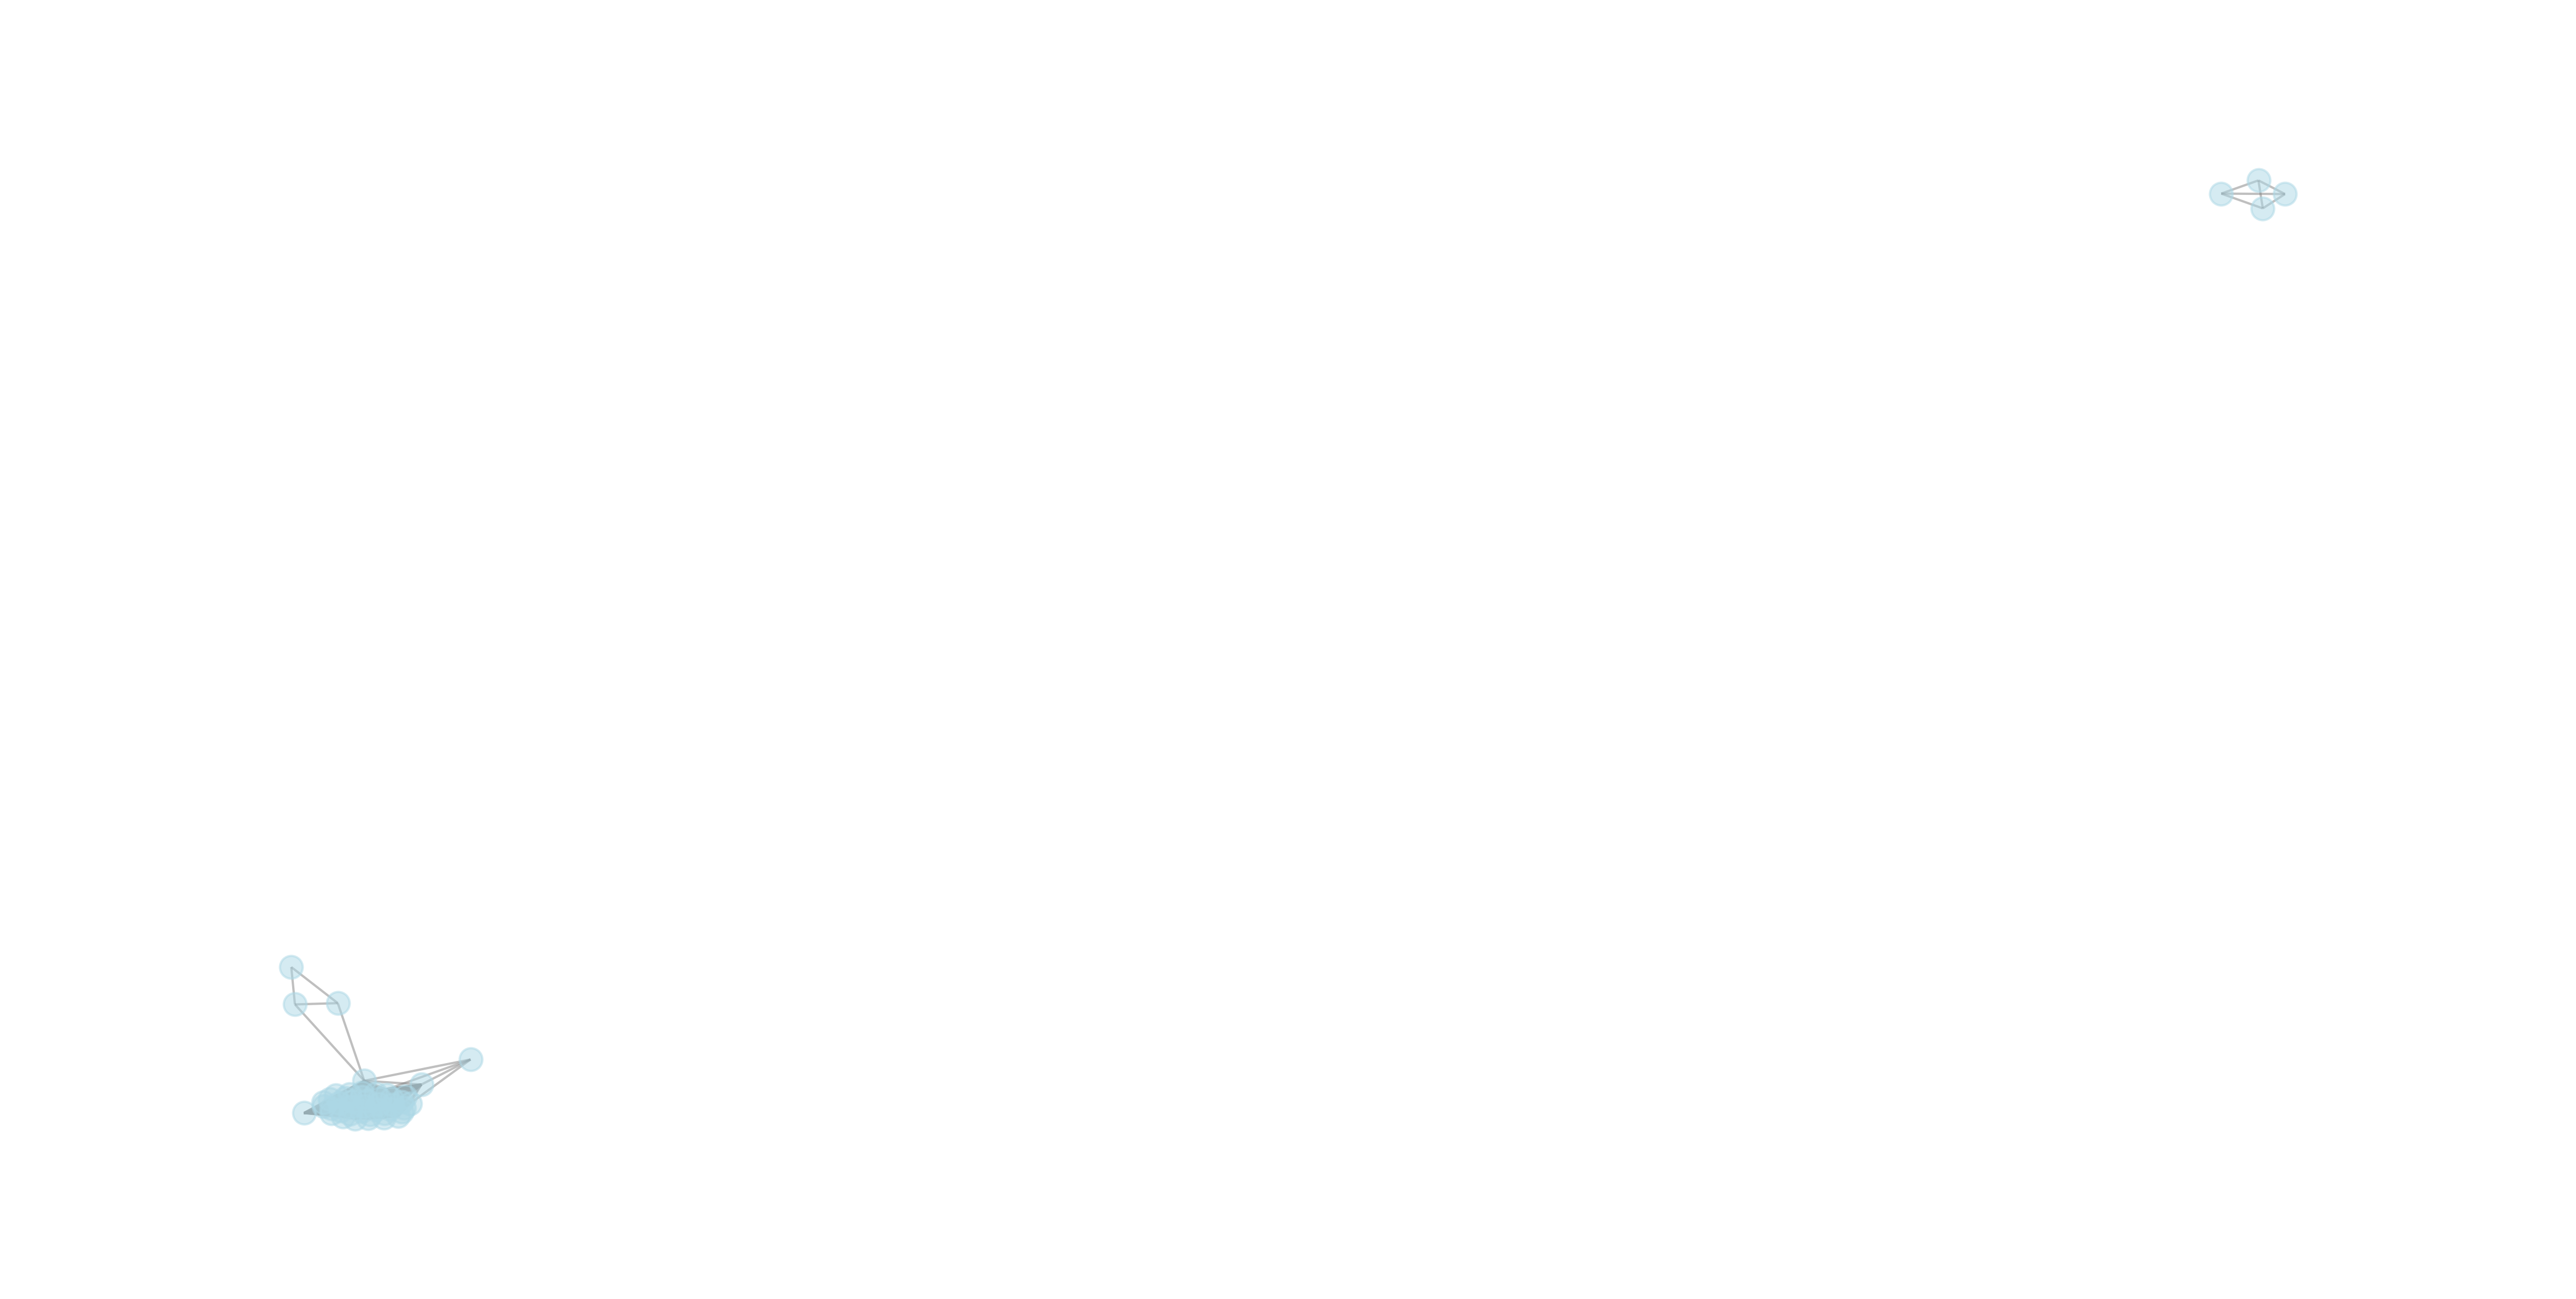

In [223]:
pos = nx.spring_layout(G_3, weight='identity', iterations=200, seed=18)
plt.figure(figsize=(19,9))
nx.draw_networkx(G_3, pos=pos, with_labels=False, node_size=100, node_color="lightblue", font_color='Black',font_size='6', font_weight='bold', edge_color='grey', alpha=0.5, width=1)
plt.axis('off')

plt.show()

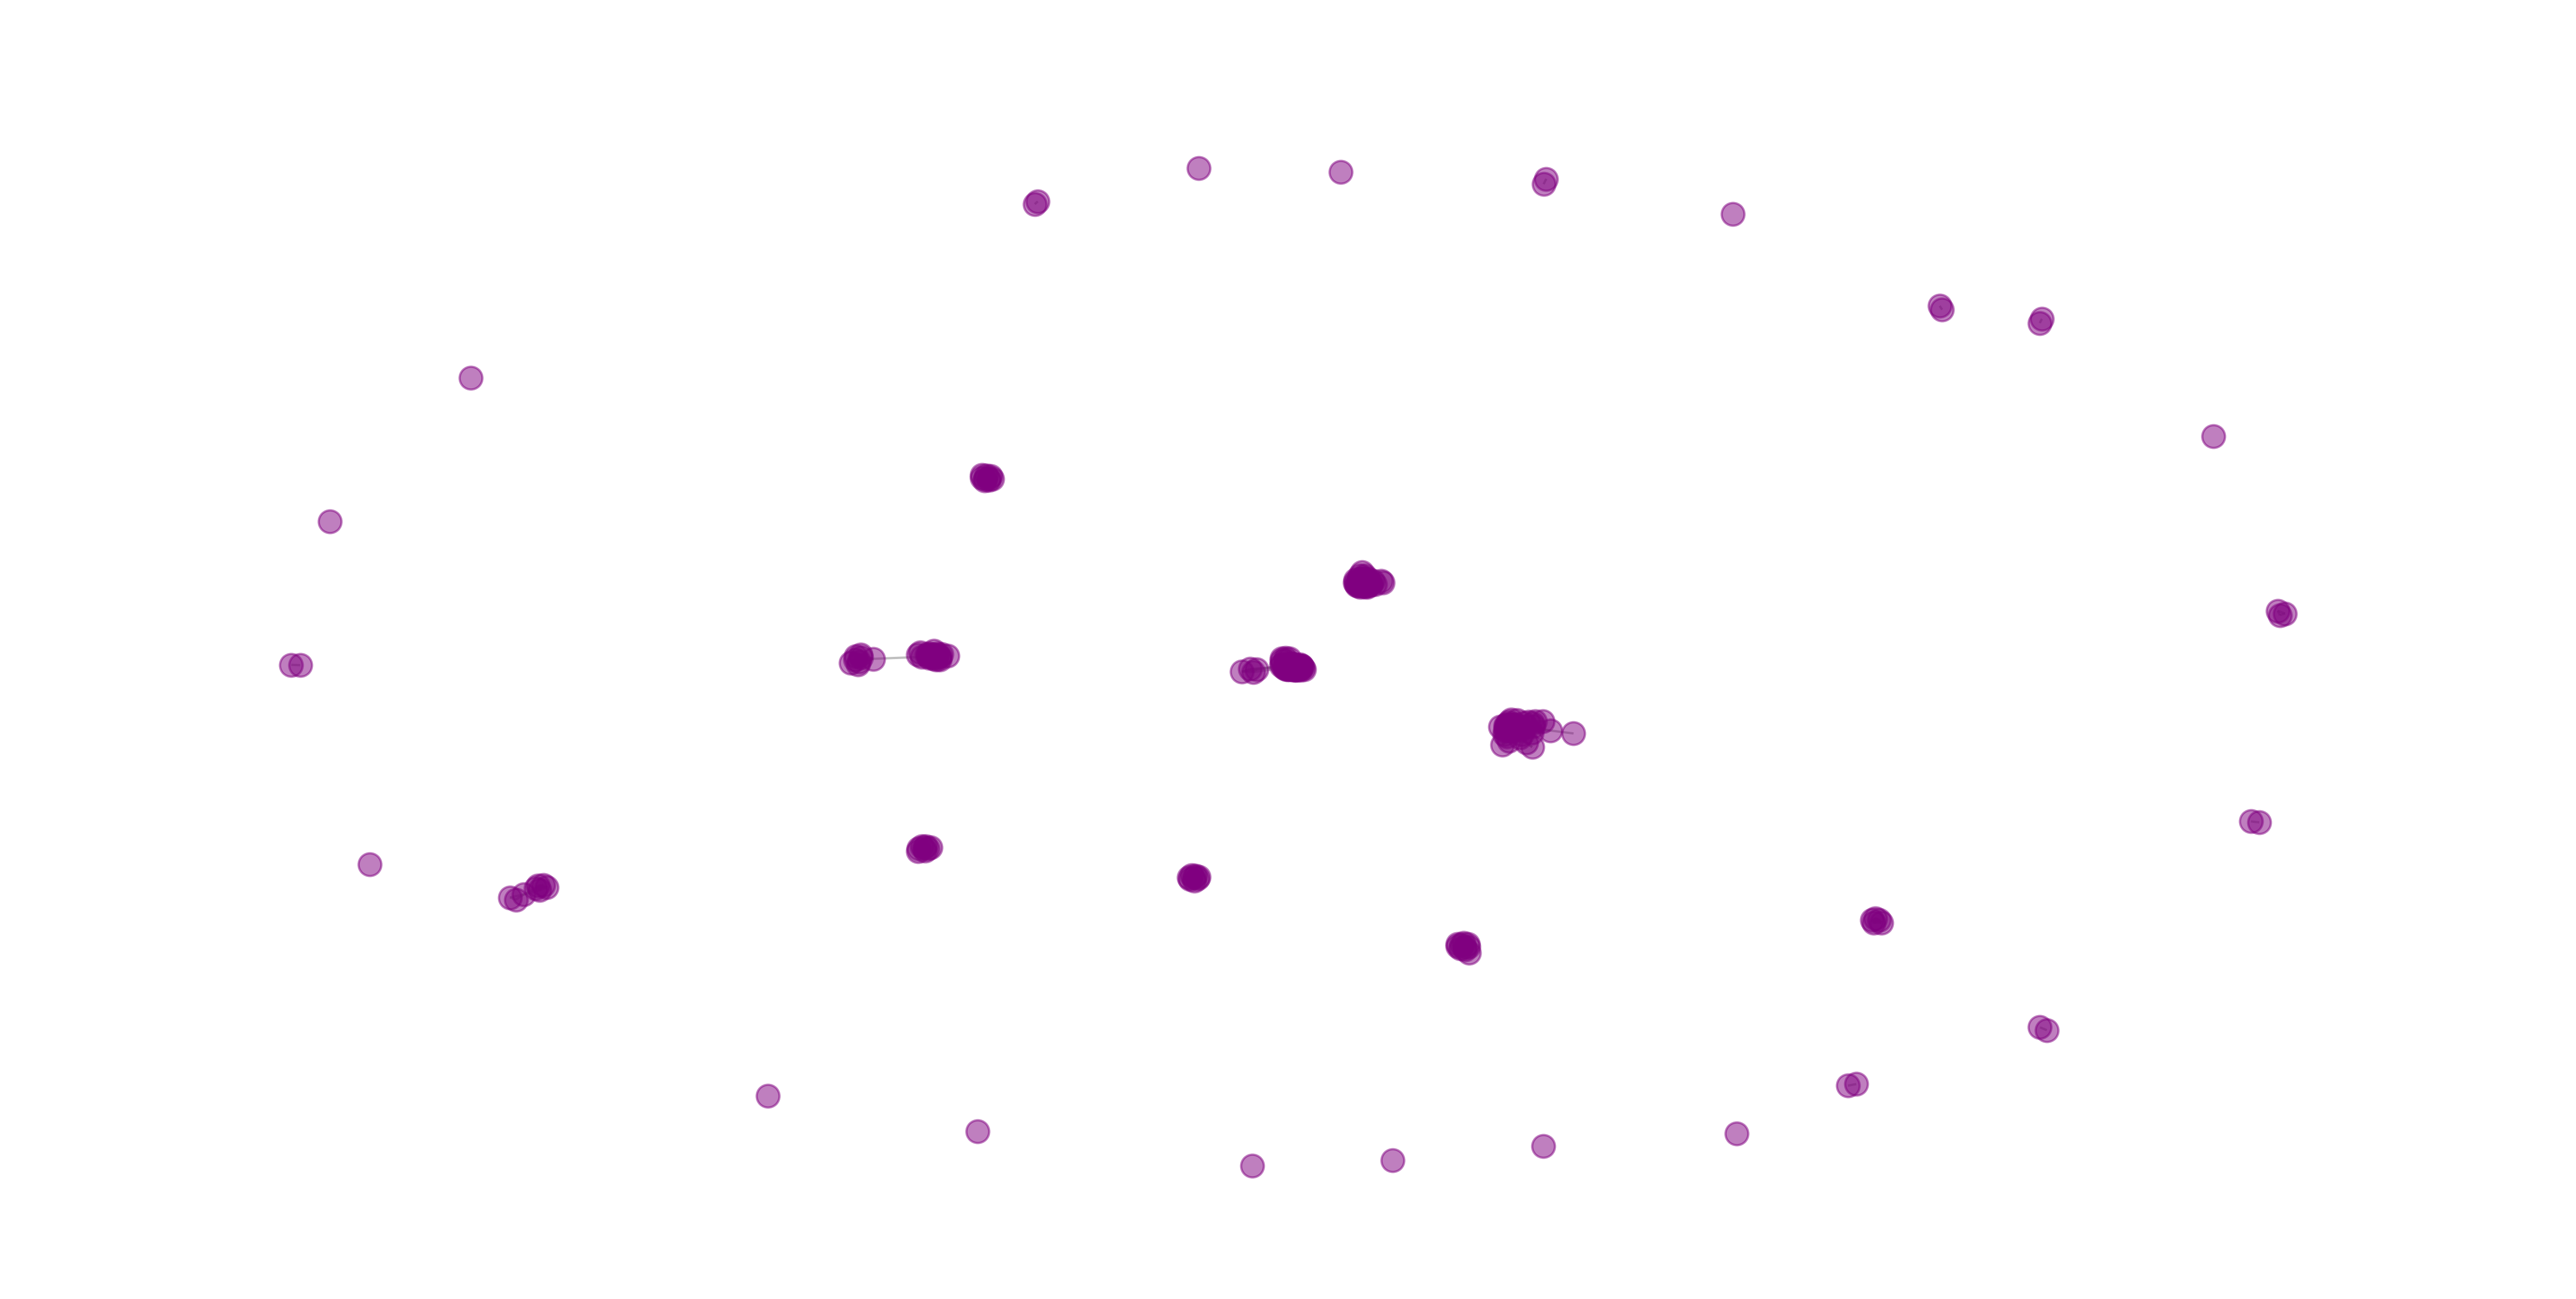

In [192]:
pos = nx.spring_layout(G_4, weight='identity', iterations=200, seed=18)
plt.figure(figsize=(19,9))
nx.draw_networkx(G_4, pos=pos, with_labels=False, node_size=100, node_color="purple", font_color='Black',font_size='6', font_weight='bold', edge_color='grey', alpha=0.5, width=1)
plt.axis('off')

plt.show()

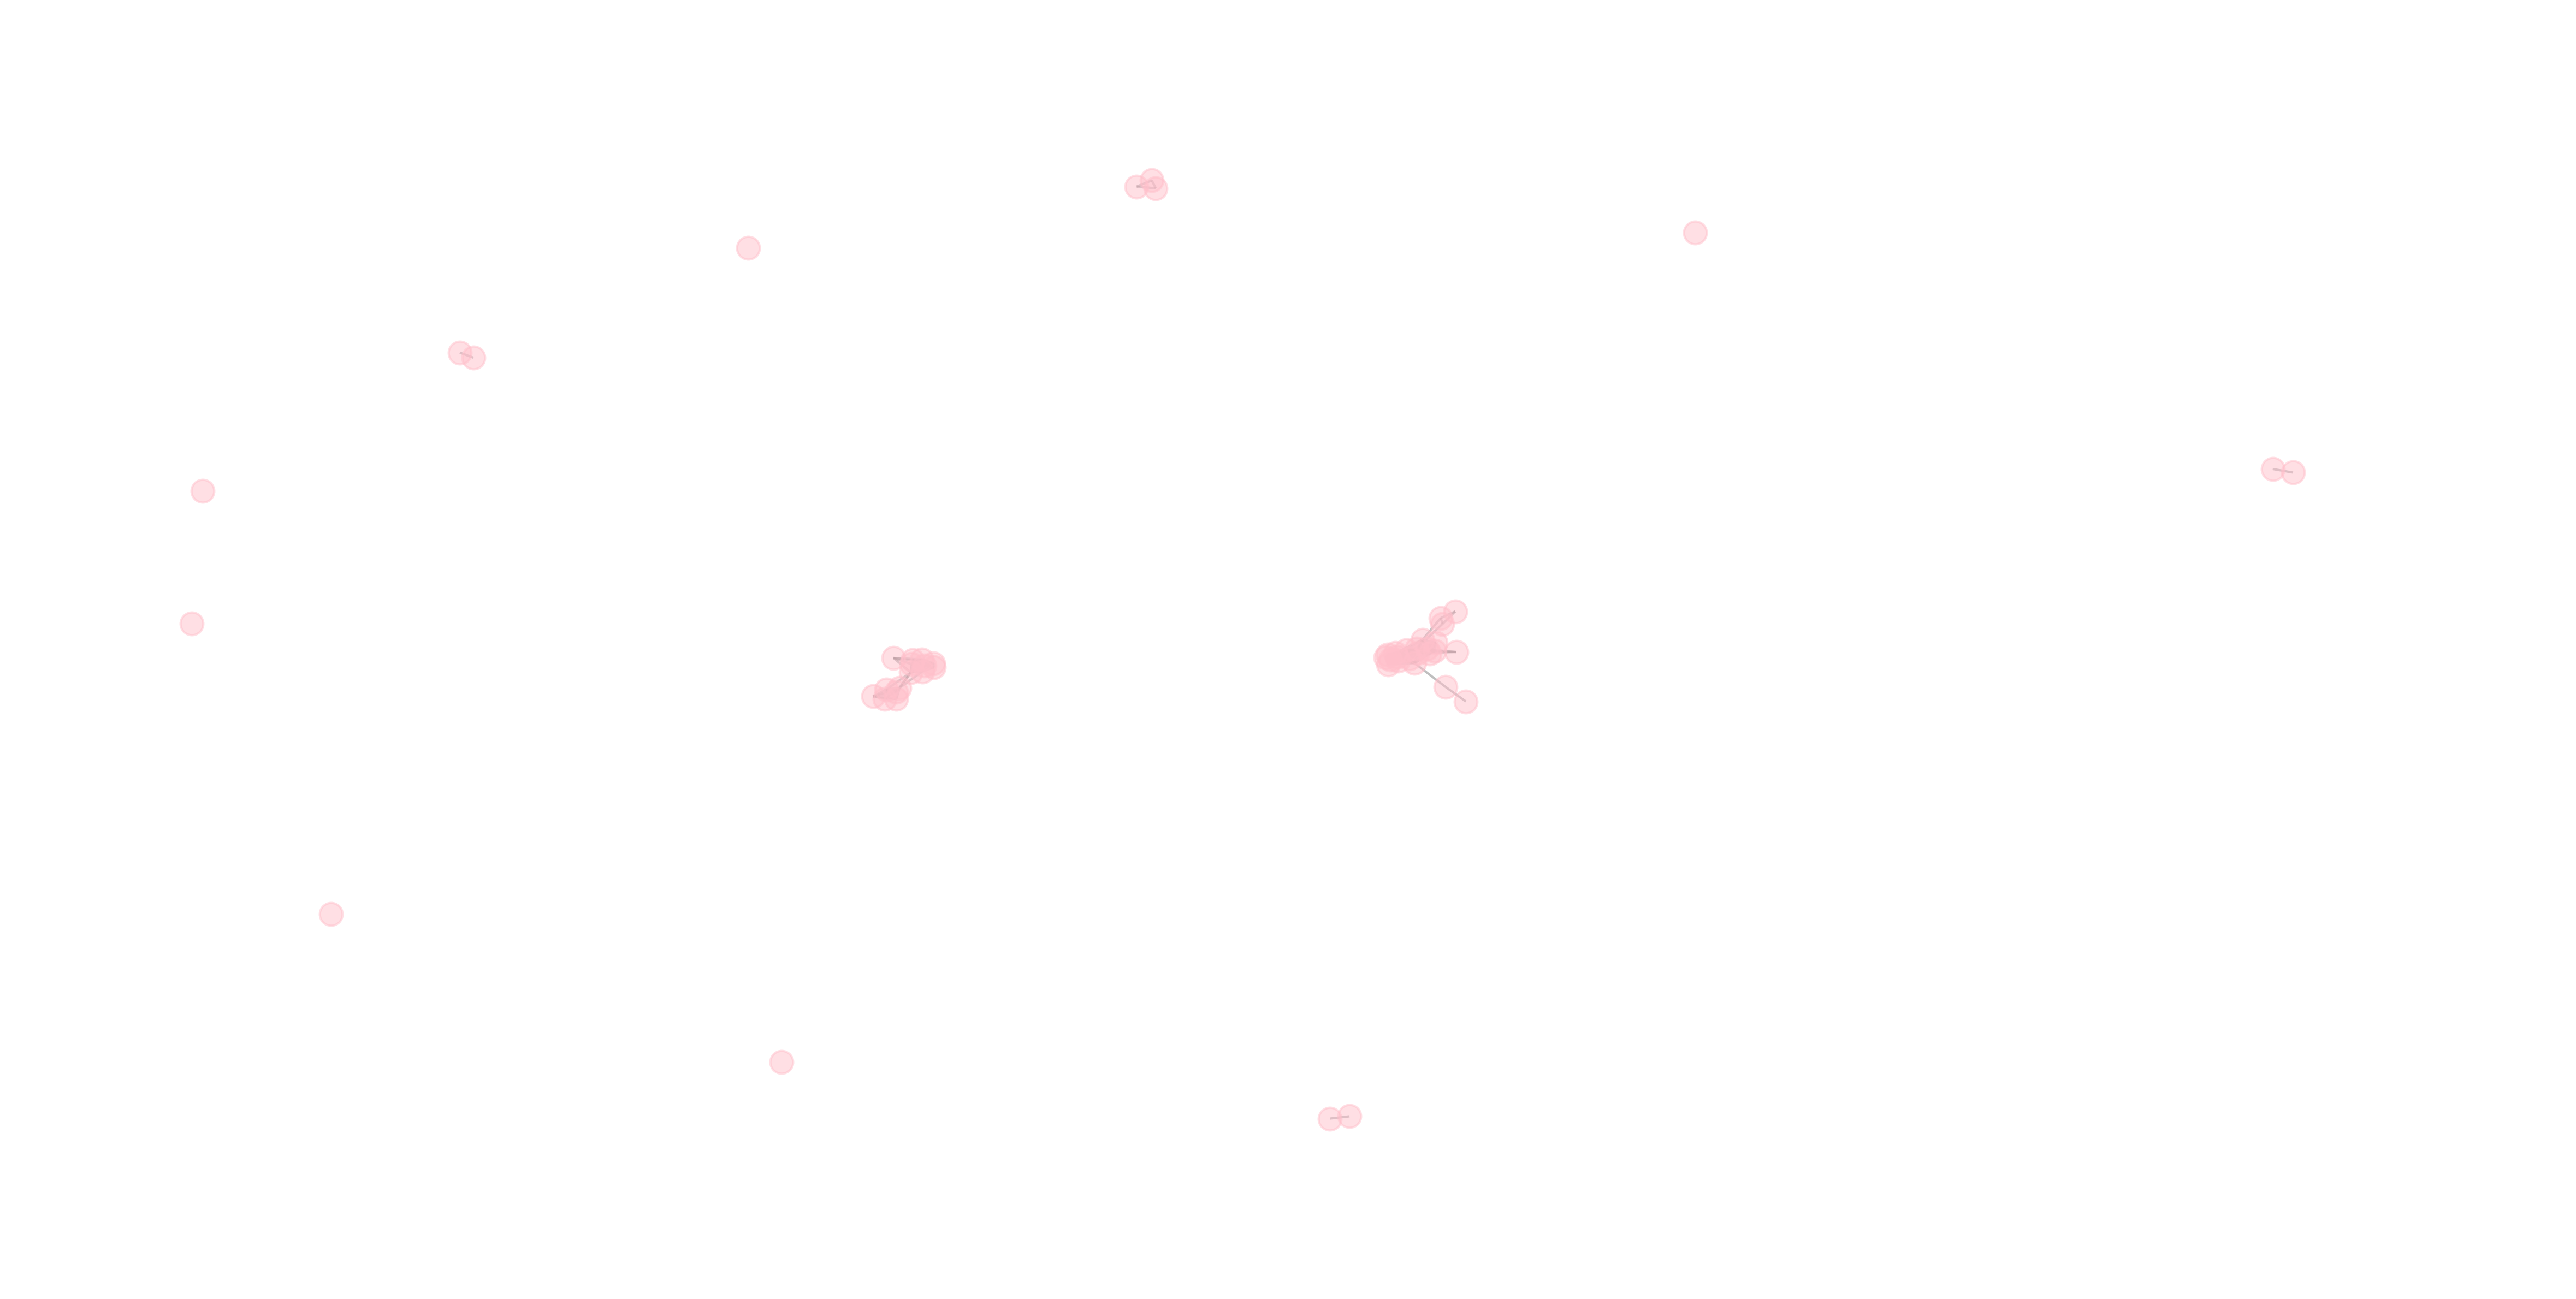

In [193]:
pos = nx.spring_layout(G_5, weight='identity', iterations=200, seed=18)
plt.figure(figsize=(19,9))
nx.draw_networkx(G_5, pos=pos, with_labels=False, node_size=100, node_color="pink", font_color='Black',font_size='6', font_weight='bold', edge_color='grey', alpha=0.5, width=1)
plt.axis('off')

plt.show()

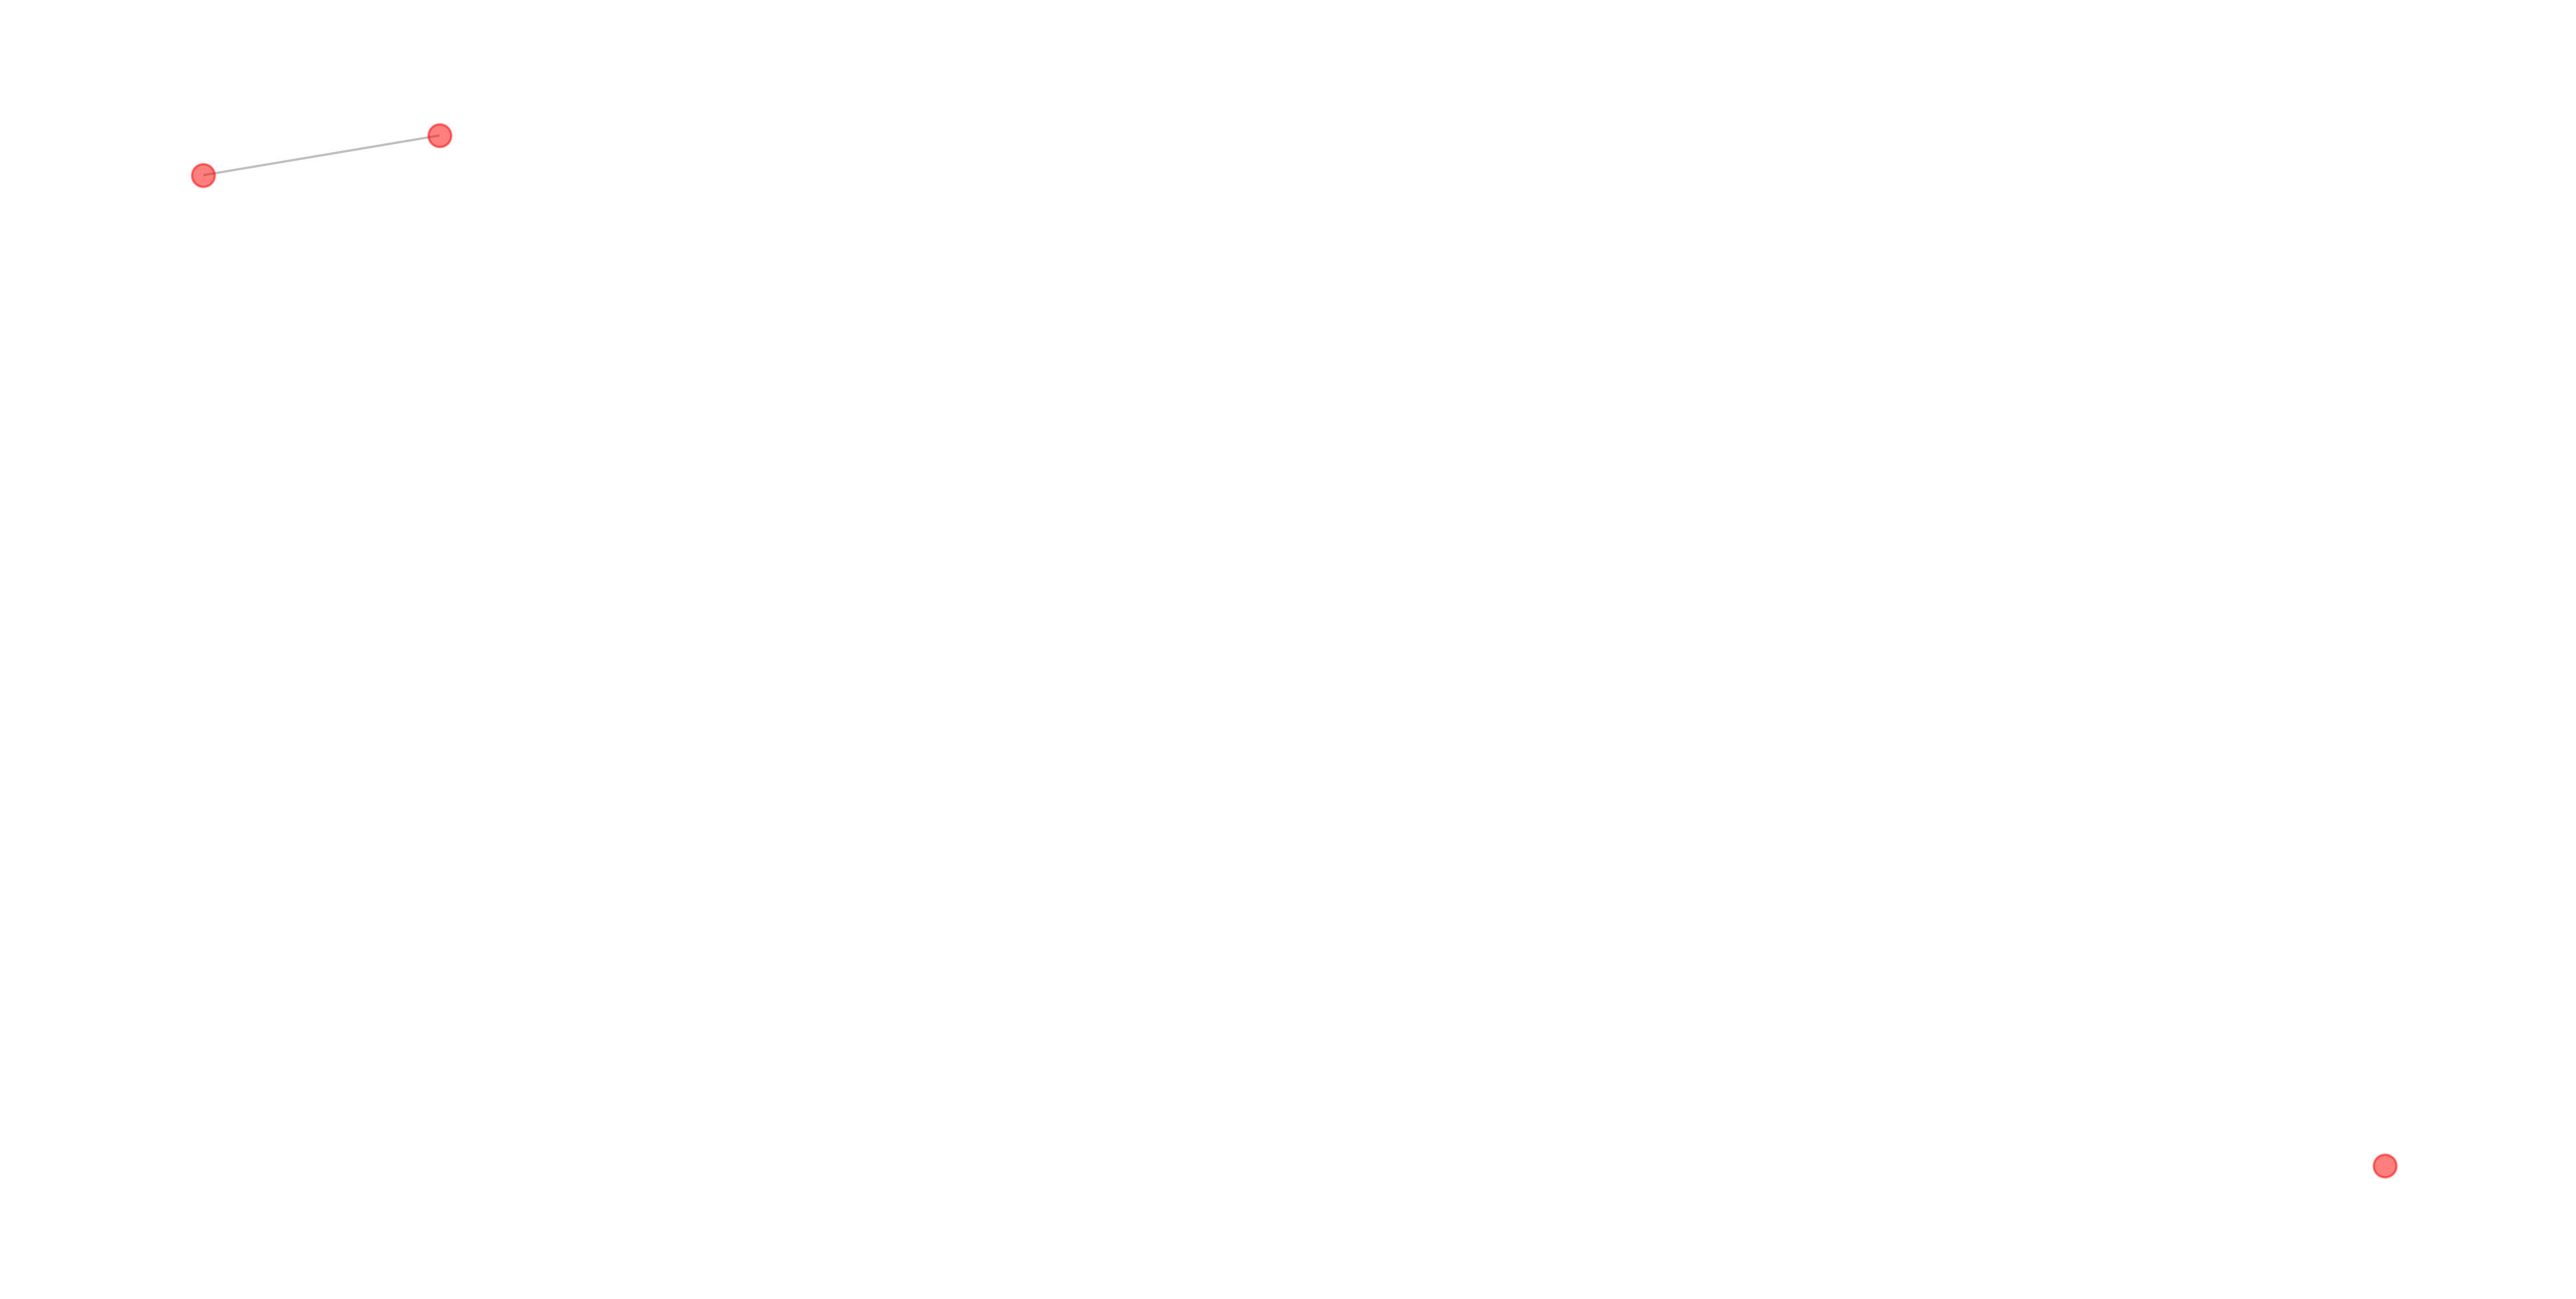

In [216]:
pos = nx.spring_layout(G_6, weight='identity', iterations=200, seed=18)
plt.figure(figsize=(19,9))
nx.draw_networkx(G_6, pos=pos, with_labels=False, node_size=100, node_color="red", font_color='Black',font_size='6', font_weight='bold', edge_color='grey', alpha=0.5, width=1)
plt.axis('off')

plt.show()

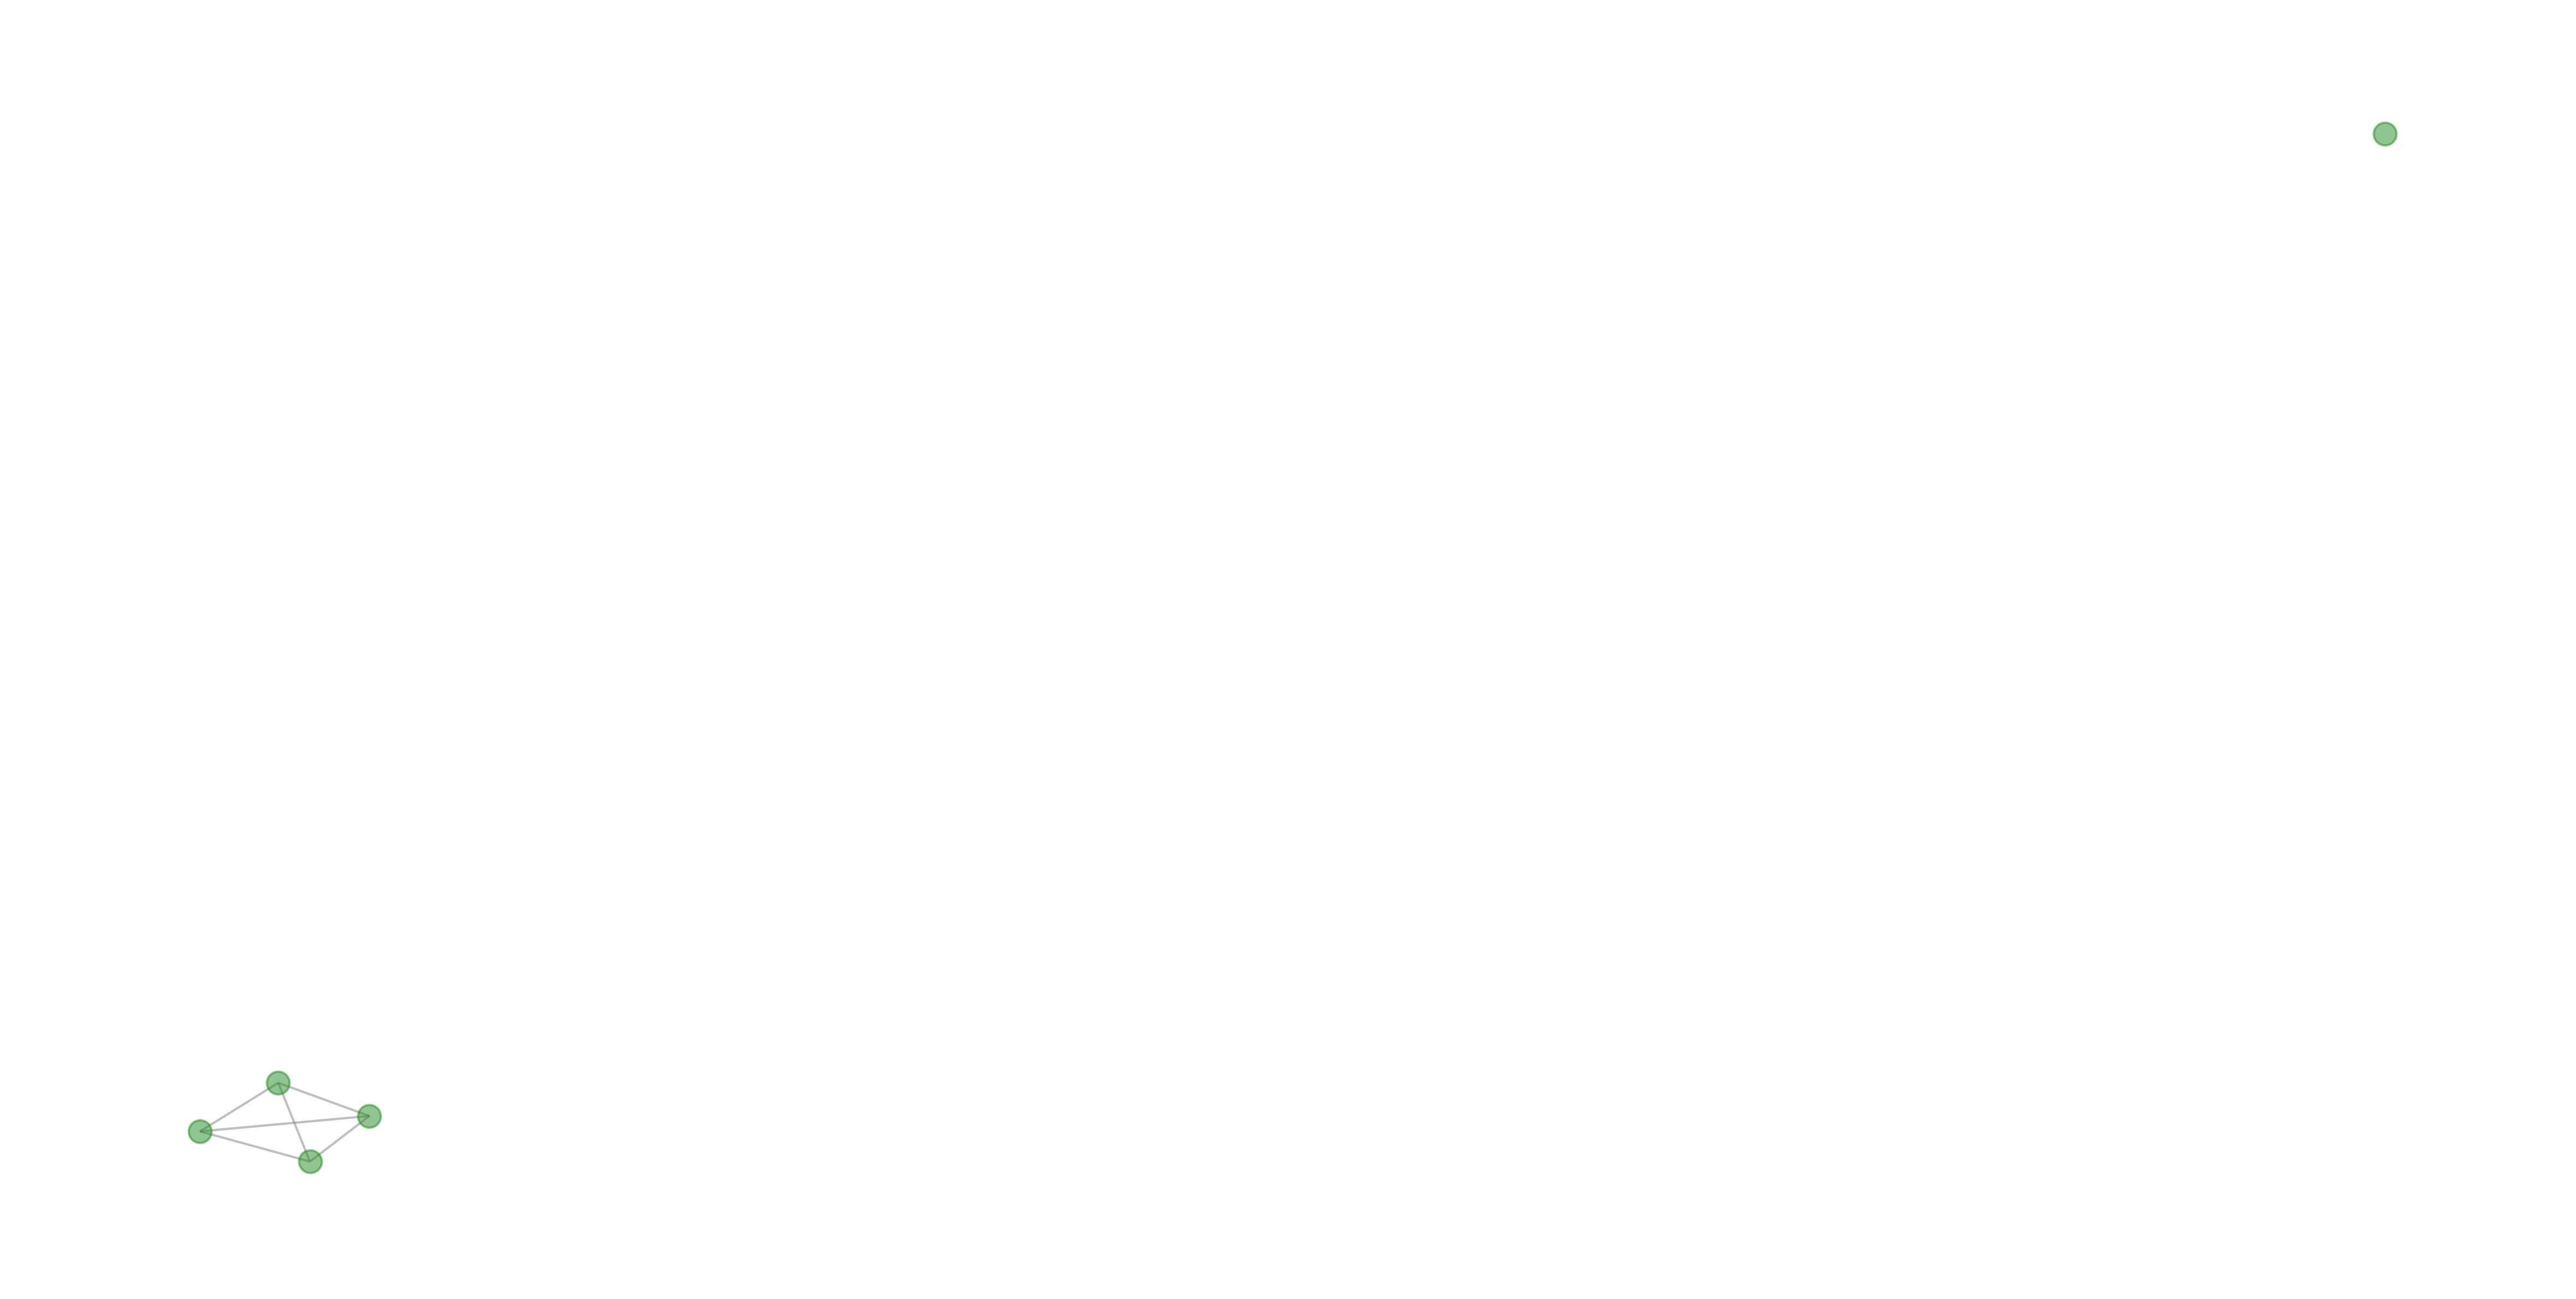

In [221]:
pos = nx.spring_layout(G_7, weight='identity', iterations=200, seed=18)
plt.figure(figsize=(19,9))
nx.draw_networkx(G_7, pos=pos, with_labels=False, node_size=100, node_color="forestgreen", font_color='Black',font_size='6', font_weight='bold', edge_color='grey', alpha=0.5, width=1)
plt.axis('off')

plt.show()

plot family 7 with plotly 

In [196]:
G_4.nodes()

NodeView(('ABR61820.1', 'ABI73008.1', 'EDP48681.1', 'ABF91899.1', 'ACC73521.1', 'ACA20507.1', 'EAU85072.1', 'AAS05967.1', 'AAK60128.1', 'ABZ98577.1', 'EDO24710.1', 'ABO03299.1', 'ABK70931.1', 'EDT08140.1', 'EAS50523.1', 'ACG63775.1', 'ABM34568.1', 'CAN95184.1', 'AAQ87263.1', 'ABI88786.1', 'CAD15856.1', 'EDR79619.1', 'EDS67819.1', 'AAA65705.1', 'ABA52998.1', 'ABN93572.1', 'ABF89860.1', 'ABW11029.1', 'ABG59664.1', 'EDN27911.1', 'ABO57218.1', 'EAT91929.1', 'ABD05422.1', 'CAP62142.1', 'EAV07014.1', 'ABP87109.1', 'ABX18554.1', 'EDU02258.1', 'ABS68573.1', 'ACC39457.1', 'BAC15574.1', 'EDU12469.1', 'EAP83642.1', 'EAM04163.1', 'CAH39260.1', 'ABD70293.1', 'EAQ83718.1', 'BAC46164.1', 'ABI41669.1', 'EAP79812.1', 'ABN84642.1', 'EBA51595.1', 'ABM95604.1', 'EAT06756.1', 'EDK04027.1', 'EDL66597.1', 'EAU46214.1', 'EAU81722.1', 'AAG00611.1', 'ABX19612.1', 'EDO92288.1', 'ABL03397.1', 'EDT38759.1', 'EDQ04457.1', 'ZP_00985070.1', 'EAV53776.1', 'ABN91764.1', 'EAX46012.1', 'EDU07740.1', 'AAF86381.1', 'CAH356

In [197]:
network_4.visualize_2d_network()

In [198]:
connected_nodes = nx.node_connected_component(G_4, "EAV51133.1" )
#S = [G_4.subgraph(c).copy() for c in nx.node_connected_component(G,"EAV51133.1")]
subgraph = G.subgraph(connected_nodes)

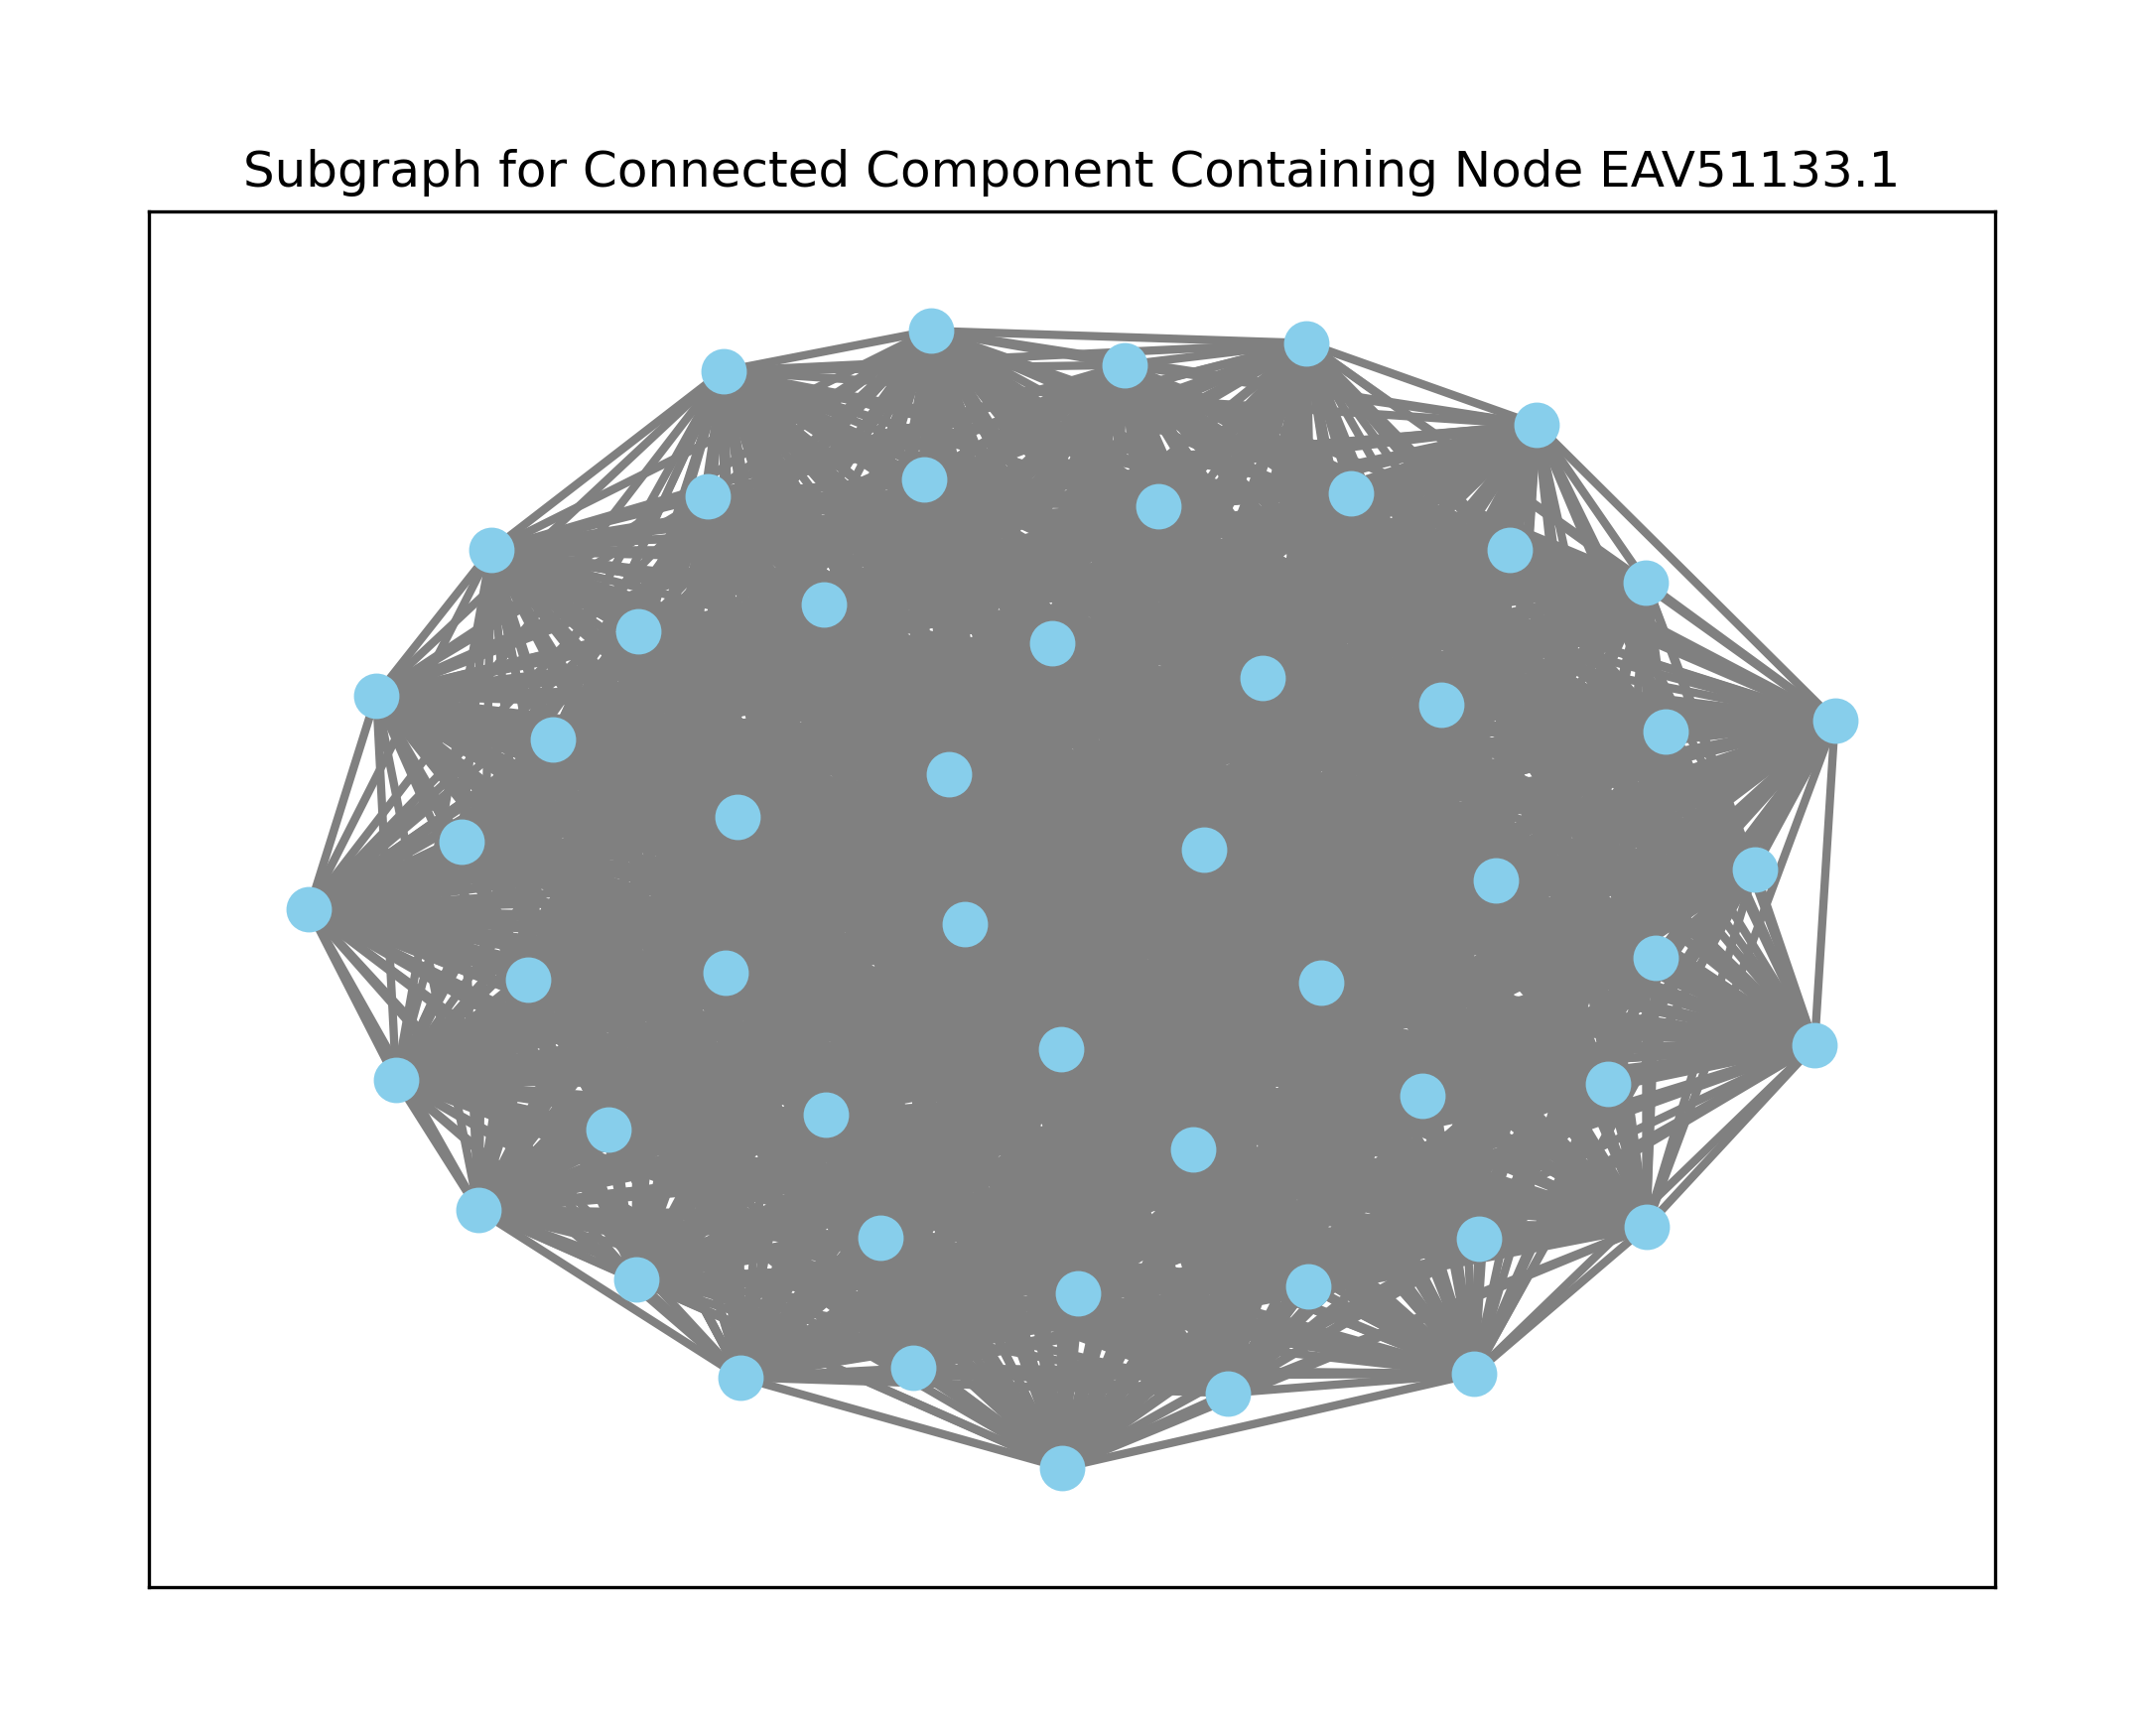

In [199]:
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(subgraph)  # positions for all nodes

# Draw the nodes
nx.draw_networkx_nodes(subgraph, pos, node_size=100, node_color='skyblue')

# Draw the edges
nx.draw_networkx_edges(subgraph, pos, width=2, edge_color='gray')

# Draw the labels
#nx.draw_networkx_labels(subgraph, pos, font_size=12, font_color='black')

plt.title(f"Subgraph for Connected Component Containing Node EAV51133.1")
plt.show()

In [200]:
#centrality = nx.betweenness_centrality(G_6)
# print(centrality)
network_6.visualize_2d_network()